# Train ADAGE models on Staph aureus data

### Georgia Doing 2022

This notebook walks through first training an ADAGE model on the same array compnedium that published eADAGE was trained on and then training a seqADAGE model on a compendium of *S. aureus* RNAseq data. The focus is on the applying the workflow to this organism.

The main objectives are to validate the training workflow using
1. Loss and validation loss curves
2. Node weight distributions
3. Node KEGG and GO enrichments

In [1]:
import run_model
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from imp import reload
import Adage
from scipy.stats import hypergeom
import csv

In [2]:
# for dev purposes, while updating run_model.py need to reload
# for dev purposes, while updating run_model.py need to reload
reload(run_model)
reload(Adage)

<module 'Adage' from '/Users/doingg/Dropbox (JAX)/Github/seqADAGE/Py/Adage.py'>

## Base features (from ADAGE)

For the sake of this efficiency, starting with the following parameters:

* hidden features: 300
* epochs: 500
* curruption: 0.01
* batchs zie: 10
* validatoin split: 0.1
* activation: sigmoid
* objective: binary cross-entropy



2266 239


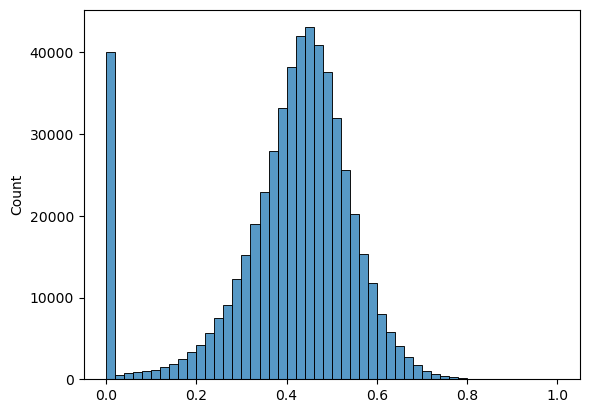

In [3]:
#adage_comp = pandas.read_csv('data_files/ADAGE_compendium.csv')
all_comp = np.loadtxt(open('../data_files/se16_log_counts_norm_01_nonames.csv', "rb"),delimiter=',',skiprows = 1)
gene_num = np.size(all_comp, 0)
samp_num = np.size(all_comp, 1)
print(gene_num, samp_num)
fig = sns.histplot(all_comp.flatten(), bins = 50)

In [4]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]
seq_temp = run_model.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
arr_temp = run_model.run_model('../data_files/train_set_normalized.csv',960,kl1=0, act = 'tanh', tied = True, epochs=1, init='glorot_normal')
tf_adage = Adage.Adage(arr_temp.autoencoder, arr_temp.history, arr_temp.compendium)
tf_weights = np.array(pd.read_csv('../outputs/ADAGE_OG_weights.csv', header = None))
tf_cost = pd.read_csv('../outputs/ADAGE_OG_cost_log.csv')
tf_adage.weights = tf_weights
tf_adage.loss = tf_cost['cost']
tf_adage.set_hwg_cutoff(2.5).shape

2023-03-27 12:11:56.097057: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


86/86 [==============================] - 1s 7ms/step - loss: 0.6937 - val_loss: 0.6912


(5549, 600)

In [5]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True]

model_dict2 = {
    "tf_adage": tf_adage
}
model_dict_seq2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    mseq = run_model.run_model('../data_files/se_se16_epi_comp_log_counts_norm_01.csv',seed=seed+561,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_seq2[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue
Epoch 1/300
22/22 [==============================] - 1s 22ms/step - loss: 0.6965 - val_loss: 0.6867
Epoch 2/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6797 - val_loss: 0.6736
Epoch 3/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6684 - val_loss: 0.6646
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6597 - val_loss: 0.6573
Epoch 5/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6527 - val_loss: 0.6517
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6475 - val_loss: 0.6478
Epoch 7/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6438 - val_loss: 0.6450
Epoch 8/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6412 - val_loss: 0.6430
Epoch 9/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6393 - val_loss: 0.6416
Epoch 10/300
22/22 [==============================] - 0s 4ms/step - los

22/22 [==============================] - 0s 4ms/step - loss: 0.6265 - val_loss: 0.6312
Epoch 83/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6264 - val_loss: 0.6311
Epoch 84/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6264 - val_loss: 0.6311
Epoch 85/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6264 - val_loss: 0.6311
Epoch 86/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6263 - val_loss: 0.6310
Epoch 87/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6263 - val_loss: 0.6310
Epoch 88/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6263 - val_loss: 0.6309
Epoch 89/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.6309
Epoch 90/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6262 - val_loss: 0.6309
Epoch 91/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6261 - val_loss: 0.6309
Epoch 92/300


22/22 [==============================] - 0s 4ms/step - loss: 0.6239 - val_loss: 0.6288
Epoch 164/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6238 - val_loss: 0.6288
Epoch 165/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6238 - val_loss: 0.6287
Epoch 166/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6238 - val_loss: 0.6287
Epoch 167/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6237 - val_loss: 0.6287
Epoch 168/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6237 - val_loss: 0.6286
Epoch 169/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6237 - val_loss: 0.6286
Epoch 170/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6236 - val_loss: 0.6286
Epoch 171/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6236 - val_loss: 0.6286
Epoch 172/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6236 - val_loss: 0.6285
Epoc

22/22 [==============================] - 0s 5ms/step - loss: 0.6215 - val_loss: 0.6266
Epoch 245/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6215 - val_loss: 0.6266
Epoch 246/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6214 - val_loss: 0.6266
Epoch 247/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6214 - val_loss: 0.6266
Epoch 248/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6214 - val_loss: 0.6265
Epoch 249/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6214 - val_loss: 0.6265
Epoch 250/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6213 - val_loss: 0.6265
Epoch 251/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6213 - val_loss: 0.6264
Epoch 252/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6213 - val_loss: 0.6264
Epoch 253/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6213 - val_loss: 0.6264
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6370 - val_loss: 0.6412
Epoch 26/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6369 - val_loss: 0.6410
Epoch 27/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6367 - val_loss: 0.6409
Epoch 28/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6365 - val_loss: 0.6407
Epoch 29/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6364 - val_loss: 0.6406
Epoch 30/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6362 - val_loss: 0.6405
Epoch 31/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6361 - val_loss: 0.6405
Epoch 32/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6359 - val_loss: 0.6403
Epoch 33/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6358 - val_loss: 0.6402
Epoch 34/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6357 - val_loss: 0.6400
Epoch 35/300


Epoch 107/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6366
Epoch 108/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6368
Epoch 109/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6366
Epoch 110/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6314 - val_loss: 0.6368
Epoch 111/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6314 - val_loss: 0.6366
Epoch 112/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6314 - val_loss: 0.6367
Epoch 113/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6369
Epoch 114/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6314 - val_loss: 0.6369
Epoch 115/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6366
Epoch 116/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_los

22/22 [==============================] - 0s 4ms/step - loss: 0.6299 - val_loss: 0.6356
Epoch 189/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6299 - val_loss: 0.6357
Epoch 190/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6299 - val_loss: 0.6355
Epoch 191/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6299 - val_loss: 0.6355
Epoch 192/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6298 - val_loss: 0.6359
Epoch 193/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6298 - val_loss: 0.6357
Epoch 194/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6298 - val_loss: 0.6355
Epoch 195/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6298 - val_loss: 0.6355
Epoch 196/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6297 - val_loss: 0.6359
Epoch 197/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6298 - val_loss: 0.6355
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6288 - val_loss: 0.6351
Epoch 270/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6288 - val_loss: 0.6348
Epoch 271/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6288 - val_loss: 0.6351
Epoch 272/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6288 - val_loss: 0.6353
Epoch 273/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6349
Epoch 274/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6288 - val_loss: 0.6353
Epoch 275/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6350
Epoch 276/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6347
Epoch 277/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6354
Epoch 278/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6287 - val_loss: 0.6349
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6325 - val_loss: 0.6377
Epoch 51/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6323 - val_loss: 0.6376
Epoch 52/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6321 - val_loss: 0.6374
Epoch 53/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6319 - val_loss: 0.6376
Epoch 54/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.6370
Epoch 55/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6370
Epoch 56/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6368
Epoch 57/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6311 - val_loss: 0.6365
Epoch 58/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6309 - val_loss: 0.6365
Epoch 59/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6307 - val_loss: 0.6362
Epoch 60/300


22/22 [==============================] - 0s 4ms/step - loss: 0.6189 - val_loss: 0.6249
Epoch 132/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6188 - val_loss: 0.6247
Epoch 133/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6188 - val_loss: 0.6247
Epoch 134/300
22/22 [==============================] - 0s 7ms/step - loss: 0.6187 - val_loss: 0.6247
Epoch 135/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6187 - val_loss: 0.6246
Epoch 136/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6187 - val_loss: 0.6246
Epoch 137/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6186 - val_loss: 0.6246
Epoch 138/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6186 - val_loss: 0.6246
Epoch 139/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6186 - val_loss: 0.6245
Epoch 140/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6185 - val_loss: 0.6245
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6169 - val_loss: 0.6228
Epoch 213/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6169 - val_loss: 0.6228
Epoch 214/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6169 - val_loss: 0.6228
Epoch 215/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6168 - val_loss: 0.6228
Epoch 216/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6168 - val_loss: 0.6228
Epoch 217/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6168 - val_loss: 0.6228
Epoch 218/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6168 - val_loss: 0.6227
Epoch 219/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6168 - val_loss: 0.6227
Epoch 220/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6168 - val_loss: 0.6227
Epoch 221/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6167 - val_loss: 0.6227
Epoc

22/22 [==============================] - 0s 5ms/step - loss: 0.6158 - val_loss: 0.6219
Epoch 294/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.6218
Epoch 295/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.6218
Epoch 296/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.6218
Epoch 297/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.6218
Epoch 298/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.6218
Epoch 299/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.6218
Epoch 300/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6158 - val_loss: 0.6218
ad_glorot_uniform_1e-05_sigmoid_tiedTrue
Epoch 1/300
22/22 [==============================] - 0s 7ms/step - loss: 0.8592 - val_loss: 0.8496
Epoch 2/300
22/22 [==============================] - 0s 4ms/step -

22/22 [==============================] - 0s 4ms/step - loss: 0.7071 - val_loss: 0.7110
Epoch 75/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7061 - val_loss: 0.7100
Epoch 76/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7052 - val_loss: 0.7091
Epoch 77/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7042 - val_loss: 0.7082
Epoch 78/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7033 - val_loss: 0.7072
Epoch 79/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7024 - val_loss: 0.7063
Epoch 80/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7015 - val_loss: 0.7054
Epoch 81/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7006 - val_loss: 0.7045
Epoch 82/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6997 - val_loss: 0.7036
Epoch 83/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6988 - val_loss: 0.7027
Epoch 84/300


22/22 [==============================] - 0s 4ms/step - loss: 0.6540 - val_loss: 0.6582
Epoch 156/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6537 - val_loss: 0.6578
Epoch 157/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6533 - val_loss: 0.6575
Epoch 158/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6572
Epoch 159/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6527 - val_loss: 0.6568
Epoch 160/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6524 - val_loss: 0.6565
Epoch 161/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6520 - val_loss: 0.6562
Epoch 162/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6517 - val_loss: 0.6559
Epoch 163/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6514 - val_loss: 0.6556
Epoch 164/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6512 - val_loss: 0.6554
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6435 - val_loss: 0.6478
Epoch 237/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6435 - val_loss: 0.6478
Epoch 238/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6435 - val_loss: 0.6478
Epoch 239/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6434 - val_loss: 0.6478
Epoch 240/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6434 - val_loss: 0.6477
Epoch 241/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6434 - val_loss: 0.6477
Epoch 242/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6433 - val_loss: 0.6477
Epoch 243/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6433 - val_loss: 0.6476
Epoch 244/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6433 - val_loss: 0.6476
Epoch 245/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6433 - val_loss: 0.6476
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.7825 - val_loss: 0.7856
Epoch 18/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7808 - val_loss: 0.7841
Epoch 19/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7793 - val_loss: 0.7825
Epoch 20/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7777 - val_loss: 0.7810
Epoch 21/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7762 - val_loss: 0.7796
Epoch 22/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7747 - val_loss: 0.7781
Epoch 23/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7733 - val_loss: 0.7767
Epoch 24/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7718 - val_loss: 0.7753
Epoch 25/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7704 - val_loss: 0.7739
Epoch 26/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7690 - val_loss: 0.7725
Epoch 27/300


22/22 [==============================] - 0s 4ms/step - loss: 0.6921 - val_loss: 0.6964
Epoch 100/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6913 - val_loss: 0.6956
Epoch 101/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6906 - val_loss: 0.6949
Epoch 102/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6899 - val_loss: 0.6942
Epoch 103/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6891 - val_loss: 0.6934
Epoch 104/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6884 - val_loss: 0.6927
Epoch 105/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6877 - val_loss: 0.6921
Epoch 106/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6870 - val_loss: 0.6914
Epoch 107/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6863 - val_loss: 0.6907
Epoch 108/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6857 - val_loss: 0.6900
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6565 - val_loss: 0.6611
Epoch 181/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6563 - val_loss: 0.6610
Epoch 182/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6562 - val_loss: 0.6608
Epoch 183/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6560 - val_loss: 0.6607
Epoch 184/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6559 - val_loss: 0.6606
Epoch 185/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6558 - val_loss: 0.6604
Epoch 186/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6556 - val_loss: 0.6603
Epoch 187/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6555 - val_loss: 0.6601
Epoch 188/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6554 - val_loss: 0.6600
Epoch 189/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6553 - val_loss: 0.6599
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6512 - val_loss: 0.6559
Epoch 262/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6512 - val_loss: 0.6559
Epoch 263/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6512 - val_loss: 0.6558
Epoch 264/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6511 - val_loss: 0.6558
Epoch 265/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6511 - val_loss: 0.6557
Epoch 266/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6511 - val_loss: 0.6557
Epoch 267/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6510 - val_loss: 0.6558
Epoch 268/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6510 - val_loss: 0.6556
Epoch 269/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6509 - val_loss: 0.6556
Epoch 270/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6509 - val_loss: 0.6555
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.7469 - val_loss: 0.7512
Epoch 43/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7457 - val_loss: 0.7499
Epoch 44/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7444 - val_loss: 0.7487
Epoch 45/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7431 - val_loss: 0.7474
Epoch 46/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7419 - val_loss: 0.7461
Epoch 47/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7406 - val_loss: 0.7449
Epoch 48/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7394 - val_loss: 0.7436
Epoch 49/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7381 - val_loss: 0.7425
Epoch 50/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7369 - val_loss: 0.7411
Epoch 51/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7357 - val_loss: 0.7400
Epoch 52/300


Epoch 124/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6657 - val_loss: 0.6707
Epoch 125/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6651 - val_loss: 0.6701
Epoch 126/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6644 - val_loss: 0.6694
Epoch 127/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6638 - val_loss: 0.6688
Epoch 128/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6632 - val_loss: 0.6682
Epoch 129/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6625 - val_loss: 0.6675
Epoch 130/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6620 - val_loss: 0.6669
Epoch 131/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6614 - val_loss: 0.6663
Epoch 132/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6608 - val_loss: 0.6658
Epoch 133/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6602 - val_los

22/22 [==============================] - 0s 4ms/step - loss: 0.6379 - val_loss: 0.6431
Epoch 206/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6378 - val_loss: 0.6429
Epoch 207/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6377 - val_loss: 0.6428
Epoch 208/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6375 - val_loss: 0.6427
Epoch 209/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6374 - val_loss: 0.6425
Epoch 210/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6373 - val_loss: 0.6424
Epoch 211/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6372 - val_loss: 0.6423
Epoch 212/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6370 - val_loss: 0.6422
Epoch 213/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6369 - val_loss: 0.6420
Epoch 214/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6368 - val_loss: 0.6419
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.6368
Epoch 287/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6316 - val_loss: 0.6367
Epoch 288/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6316 - val_loss: 0.6367
Epoch 289/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6366
Epoch 290/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6366
Epoch 291/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6314 - val_loss: 0.6365
Epoch 292/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6314 - val_loss: 0.6365
Epoch 293/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6364
Epoch 294/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6364
Epoch 295/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6312 - val_loss: 0.6363
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6271 - val_loss: 0.6317
Epoch 68/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6271 - val_loss: 0.6317
Epoch 69/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6270 - val_loss: 0.6316
Epoch 70/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6270 - val_loss: 0.6316
Epoch 71/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6269 - val_loss: 0.6316
Epoch 72/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6269 - val_loss: 0.6315
Epoch 73/300
22/22 [==============================] - 0s 7ms/step - loss: 0.6268 - val_loss: 0.6315
Epoch 74/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6268 - val_loss: 0.6314
Epoch 75/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6268 - val_loss: 0.6314
Epoch 76/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6267 - val_loss: 0.6314
Epoch 77/300


22/22 [==============================] - 0s 4ms/step - loss: 0.6243 - val_loss: 0.6292
Epoch 149/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6243 - val_loss: 0.6291
Epoch 150/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6243 - val_loss: 0.6291
Epoch 151/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6291
Epoch 152/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6290
Epoch 153/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6242 - val_loss: 0.6290
Epoch 154/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6242 - val_loss: 0.6290
Epoch 155/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6241 - val_loss: 0.6289
Epoch 156/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6241 - val_loss: 0.6289
Epoch 157/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6241 - val_loss: 0.6289
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6219 - val_loss: 0.6269
Epoch 230/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6219 - val_loss: 0.6268
Epoch 231/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6219 - val_loss: 0.6268
Epoch 232/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6218 - val_loss: 0.6268
Epoch 233/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6218 - val_loss: 0.6268
Epoch 234/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6218 - val_loss: 0.6268
Epoch 235/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6218 - val_loss: 0.6267
Epoch 236/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6217 - val_loss: 0.6267
Epoch 237/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6217 - val_loss: 0.6267
Epoch 238/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6217 - val_loss: 0.6267
Epoc

22/22 [==============================] - 0s 5ms/step - loss: 0.6435 - val_loss: 0.6464
Epoch 11/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6424 - val_loss: 0.6456
Epoch 12/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6415 - val_loss: 0.6449
Epoch 13/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6408 - val_loss: 0.6443
Epoch 14/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6403 - val_loss: 0.6439
Epoch 15/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6398 - val_loss: 0.6435
Epoch 16/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6393 - val_loss: 0.6431
Epoch 17/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6390 - val_loss: 0.6428
Epoch 18/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6386 - val_loss: 0.6426
Epoch 19/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6383 - val_loss: 0.6423
Epoch 20/300


22/22 [==============================] - 0s 5ms/step - loss: 0.6318 - val_loss: 0.6371
Epoch 93/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6318 - val_loss: 0.6369
Epoch 94/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6318 - val_loss: 0.6368
Epoch 95/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6319 - val_loss: 0.6369
Epoch 96/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6317 - val_loss: 0.6370
Epoch 97/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.6368
Epoch 98/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.6372
Epoch 99/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.6367
Epoch 100/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6370
Epoch 101/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6316 - val_loss: 0.6367
Epoch 102/3

22/22 [==============================] - 0s 4ms/step - loss: 0.6301 - val_loss: 0.6359
Epoch 174/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6301 - val_loss: 0.6360
Epoch 175/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6301 - val_loss: 0.6360
Epoch 176/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6302 - val_loss: 0.6357
Epoch 177/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6301 - val_loss: 0.6359
Epoch 178/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6300 - val_loss: 0.6358
Epoch 179/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6300 - val_loss: 0.6358
Epoch 180/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6300 - val_loss: 0.6356
Epoch 181/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6300 - val_loss: 0.6358
Epoch 182/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6300 - val_loss: 0.6359
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6289 - val_loss: 0.6352
Epoch 255/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6289 - val_loss: 0.6354
Epoch 256/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6289 - val_loss: 0.6351
Epoch 257/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6289 - val_loss: 0.6348
Epoch 258/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6289 - val_loss: 0.6351
Epoch 259/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6289 - val_loss: 0.6348
Epoch 260/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6290 - val_loss: 0.6350
Epoch 261/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6289 - val_loss: 0.6352
Epoch 262/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6289 - val_loss: 0.6348
Epoch 263/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6288 - val_loss: 0.6352
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6354 - val_loss: 0.6402
Epoch 36/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6352 - val_loss: 0.6400
Epoch 37/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6351 - val_loss: 0.6398
Epoch 38/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6349 - val_loss: 0.6396
Epoch 39/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6348 - val_loss: 0.6396
Epoch 40/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6346 - val_loss: 0.6396
Epoch 41/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6344 - val_loss: 0.6391
Epoch 42/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6343 - val_loss: 0.6394
Epoch 43/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6341 - val_loss: 0.6394
Epoch 44/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6340 - val_loss: 0.6388
Epoch 45/300


Epoch 117/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6200 - val_loss: 0.6260
Epoch 118/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6199 - val_loss: 0.6259
Epoch 119/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6198 - val_loss: 0.6259
Epoch 120/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6197 - val_loss: 0.6258
Epoch 121/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6196 - val_loss: 0.6258
Epoch 122/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6195 - val_loss: 0.6256
Epoch 123/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6195 - val_loss: 0.6255
Epoch 124/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6194 - val_loss: 0.6256
Epoch 125/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6193 - val_loss: 0.6254
Epoch 126/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6193 - val_los

22/22 [==============================] - 0s 4ms/step - loss: 0.6171 - val_loss: 0.6230
Epoch 199/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6171 - val_loss: 0.6230
Epoch 200/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6171 - val_loss: 0.6230
Epoch 201/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6171 - val_loss: 0.6230
Epoch 202/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6171 - val_loss: 0.6230
Epoch 203/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6171 - val_loss: 0.6229
Epoch 204/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.6229
Epoch 205/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.6229
Epoch 206/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6170 - val_loss: 0.6229
Epoch 207/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6170 - val_loss: 0.6229
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6220
Epoch 280/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6220
Epoch 281/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6219
Epoch 282/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6219
Epoch 283/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6219
Epoch 284/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6219
Epoch 285/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6219
Epoch 286/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6219
Epoch 287/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6160 - val_loss: 0.6219
Epoch 288/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6159 - val_loss: 0.6219
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.7170 - val_loss: 0.7208
Epoch 61/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7160 - val_loss: 0.7198
Epoch 62/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7150 - val_loss: 0.7189
Epoch 63/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7141 - val_loss: 0.7179
Epoch 64/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7132 - val_loss: 0.7170
Epoch 65/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7122 - val_loss: 0.7161
Epoch 66/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7113 - val_loss: 0.7152
Epoch 67/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7104 - val_loss: 0.7143
Epoch 68/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7095 - val_loss: 0.7134
Epoch 69/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7086 - val_loss: 0.7125
Epoch 70/300


22/22 [==============================] - 0s 5ms/step - loss: 0.6632 - val_loss: 0.6673
Epoch 142/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6628 - val_loss: 0.6669
Epoch 143/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6624 - val_loss: 0.6666
Epoch 144/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6621 - val_loss: 0.6662
Epoch 145/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6617 - val_loss: 0.6658
Epoch 146/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6613 - val_loss: 0.6654
Epoch 147/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6609 - val_loss: 0.6650
Epoch 148/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6606 - val_loss: 0.6647
Epoch 149/300
22/22 [==============================] - 0s 7ms/step - loss: 0.6602 - val_loss: 0.6643
Epoch 150/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6598 - val_loss: 0.6639
Epoc

22/22 [==============================] - 0s 5ms/step - loss: 0.6453 - val_loss: 0.6496
Epoch 223/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6452 - val_loss: 0.6495
Epoch 224/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6451 - val_loss: 0.6494
Epoch 225/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6451 - val_loss: 0.6493
Epoch 226/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6450 - val_loss: 0.6492
Epoch 227/300
22/22 [==============================] - 0s 7ms/step - loss: 0.6449 - val_loss: 0.6492
Epoch 228/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6448 - val_loss: 0.6491
Epoch 229/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6448 - val_loss: 0.6490
Epoch 230/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6447 - val_loss: 0.6489
Epoch 231/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6446 - val_loss: 0.6489
Epoc

Epoch 3/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8284 - val_loss: 0.8242
Epoch 4/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8179 - val_loss: 0.8150
Epoch 5/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8091 - val_loss: 0.8079
Epoch 6/300
22/22 [==============================] - 0s 4ms/step - loss: 0.8025 - val_loss: 0.8026
Epoch 7/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7975 - val_loss: 0.7986
Epoch 8/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7937 - val_loss: 0.7954
Epoch 9/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7906 - val_loss: 0.7927
Epoch 10/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7880 - val_loss: 0.7904
Epoch 11/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7857 - val_loss: 0.7883
Epoch 12/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7836 - val_loss: 0.7864
Epoch 1

Epoch 85/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7016 - val_loss: 0.7060
Epoch 86/300
22/22 [==============================] - 0s 12ms/step - loss: 0.7009 - val_loss: 0.7052
Epoch 87/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7001 - val_loss: 0.7045
Epoch 88/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6994 - val_loss: 0.7038
Epoch 89/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6987 - val_loss: 0.7031
Epoch 90/300
22/22 [==============================] - 0s 3ms/step - loss: 0.6980 - val_loss: 0.7024
Epoch 91/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6973 - val_loss: 0.7017
Epoch 92/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6966 - val_loss: 0.7010
Epoch 93/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6959 - val_loss: 0.7003
Epoch 94/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6952 - val_loss: 0.6996

22/22 [==============================] - 0s 4ms/step - loss: 0.6632 - val_loss: 0.6679
Epoch 167/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6630 - val_loss: 0.6676
Epoch 168/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6627 - val_loss: 0.6674
Epoch 169/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6625 - val_loss: 0.6672
Epoch 170/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6622 - val_loss: 0.6669
Epoch 171/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6620 - val_loss: 0.6667
Epoch 172/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6618 - val_loss: 0.6665
Epoch 173/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6616 - val_loss: 0.6662
Epoch 174/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6614 - val_loss: 0.6660
Epoch 175/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6611 - val_loss: 0.6658
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6531 - val_loss: 0.6578
Epoch 248/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6578
Epoch 249/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6530 - val_loss: 0.6577
Epoch 250/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6529 - val_loss: 0.6577
Epoch 251/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6529 - val_loss: 0.6576
Epoch 252/300
22/22 [==============================] - 0s 6ms/step - loss: 0.6528 - val_loss: 0.6575
Epoch 253/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6528 - val_loss: 0.6575
Epoch 254/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6527 - val_loss: 0.6574
Epoch 255/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6527 - val_loss: 0.6574
Epoch 256/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6526 - val_loss: 0.6574
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.7582 - val_loss: 0.7620
Epoch 29/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7569 - val_loss: 0.7605
Epoch 30/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7555 - val_loss: 0.7593
Epoch 31/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7542 - val_loss: 0.7581
Epoch 32/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7529 - val_loss: 0.7567
Epoch 33/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7516 - val_loss: 0.7555
Epoch 34/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7504 - val_loss: 0.7542
Epoch 35/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7491 - val_loss: 0.7529
Epoch 36/300
22/22 [==============================] - 0s 5ms/step - loss: 0.7478 - val_loss: 0.7518
Epoch 37/300
22/22 [==============================] - 0s 4ms/step - loss: 0.7466 - val_loss: 0.7506
Epoch 38/300


Epoch 110/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6766 - val_loss: 0.6815
Epoch 111/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6759 - val_loss: 0.6808
Epoch 112/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6752 - val_loss: 0.6801
Epoch 113/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6746 - val_loss: 0.6795
Epoch 114/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6739 - val_loss: 0.6789
Epoch 115/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6733 - val_loss: 0.6782
Epoch 116/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6726 - val_loss: 0.6775
Epoch 117/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6720 - val_loss: 0.6770
Epoch 118/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6714 - val_loss: 0.6763
Epoch 119/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6707 - val_los

22/22 [==============================] - 0s 4ms/step - loss: 0.6426 - val_loss: 0.6476
Epoch 192/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6424 - val_loss: 0.6474
Epoch 193/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6422 - val_loss: 0.6472
Epoch 194/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6420 - val_loss: 0.6470
Epoch 195/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6418 - val_loss: 0.6468
Epoch 196/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6416 - val_loss: 0.6466
Epoch 197/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6413 - val_loss: 0.6464
Epoch 198/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6411 - val_loss: 0.6461
Epoch 199/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6409 - val_loss: 0.6460
Epoch 200/300
22/22 [==============================] - 0s 5ms/step - loss: 0.6408 - val_loss: 0.6457
Epoc

22/22 [==============================] - 0s 4ms/step - loss: 0.6318 - val_loss: 0.6369
Epoch 273/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6317 - val_loss: 0.6368
Epoch 274/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6316 - val_loss: 0.6367
Epoch 275/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6316 - val_loss: 0.6366
Epoch 276/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6315 - val_loss: 0.6366
Epoch 277/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6314 - val_loss: 0.6365
Epoch 278/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6314 - val_loss: 0.6364
Epoch 279/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6313 - val_loss: 0.6364
Epoch 280/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6312 - val_loss: 0.6363
Epoch 281/300
22/22 [==============================] - 0s 4ms/step - loss: 0.6312 - val_loss: 0.6363
Epoc

[Text(0.5, 1.0, 'tf_adage')]

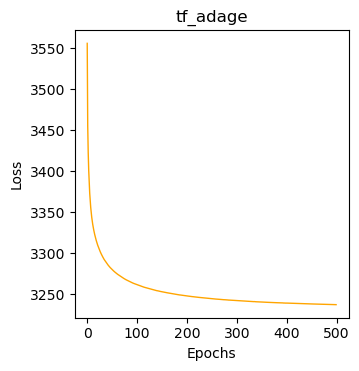

In [6]:
yd = 1 #len(inits) * len(L1_norm)
xd = 1 #len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)


#name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) + str(460)
                #print(name)
name = 'tf_adage'
model_temp = model_dict_seq2[name]
ax.plot(list(range(0,500)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
ax.set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
#ax.axvline(x = np.std(model_temp.weights)*2.5)
#ax.axvline(x = np.std(model_temp.weights)*-2.5)
ax.set(title = name)
#ax.set_yscale('log')



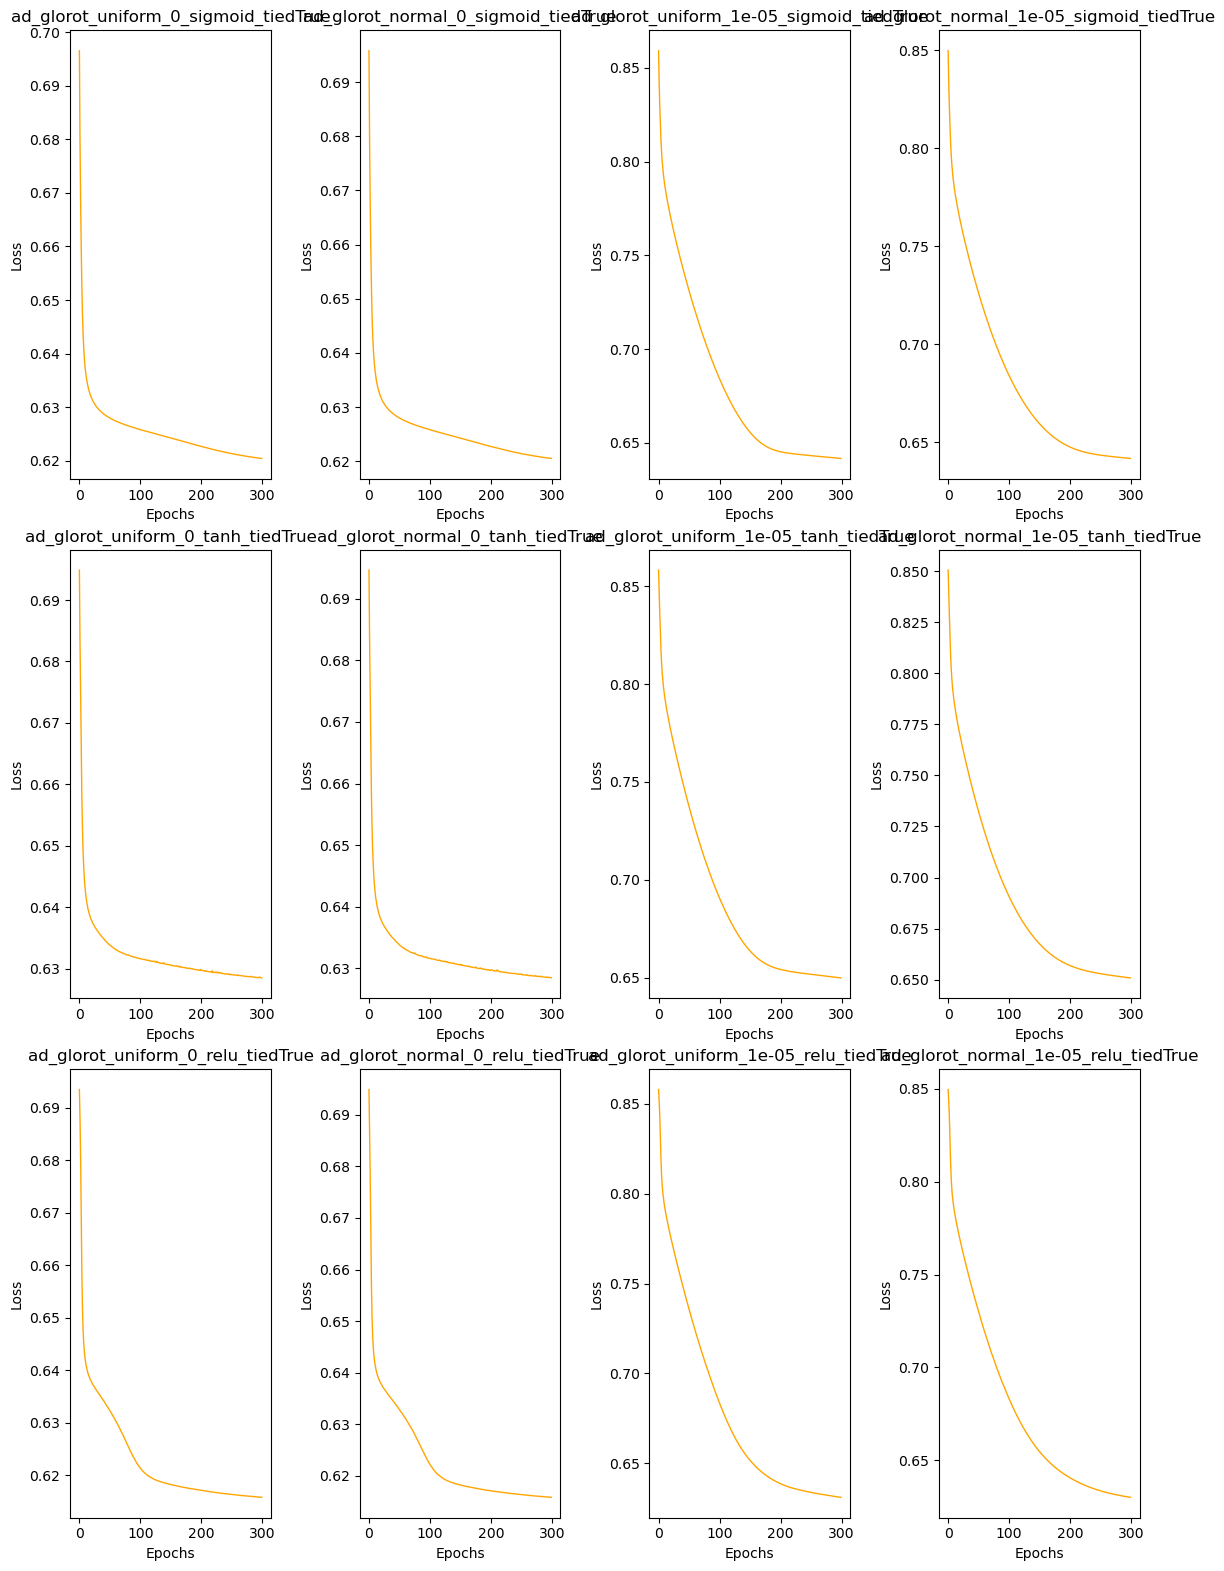

In [7]:
model_dict = model_dict_seq2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,300)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

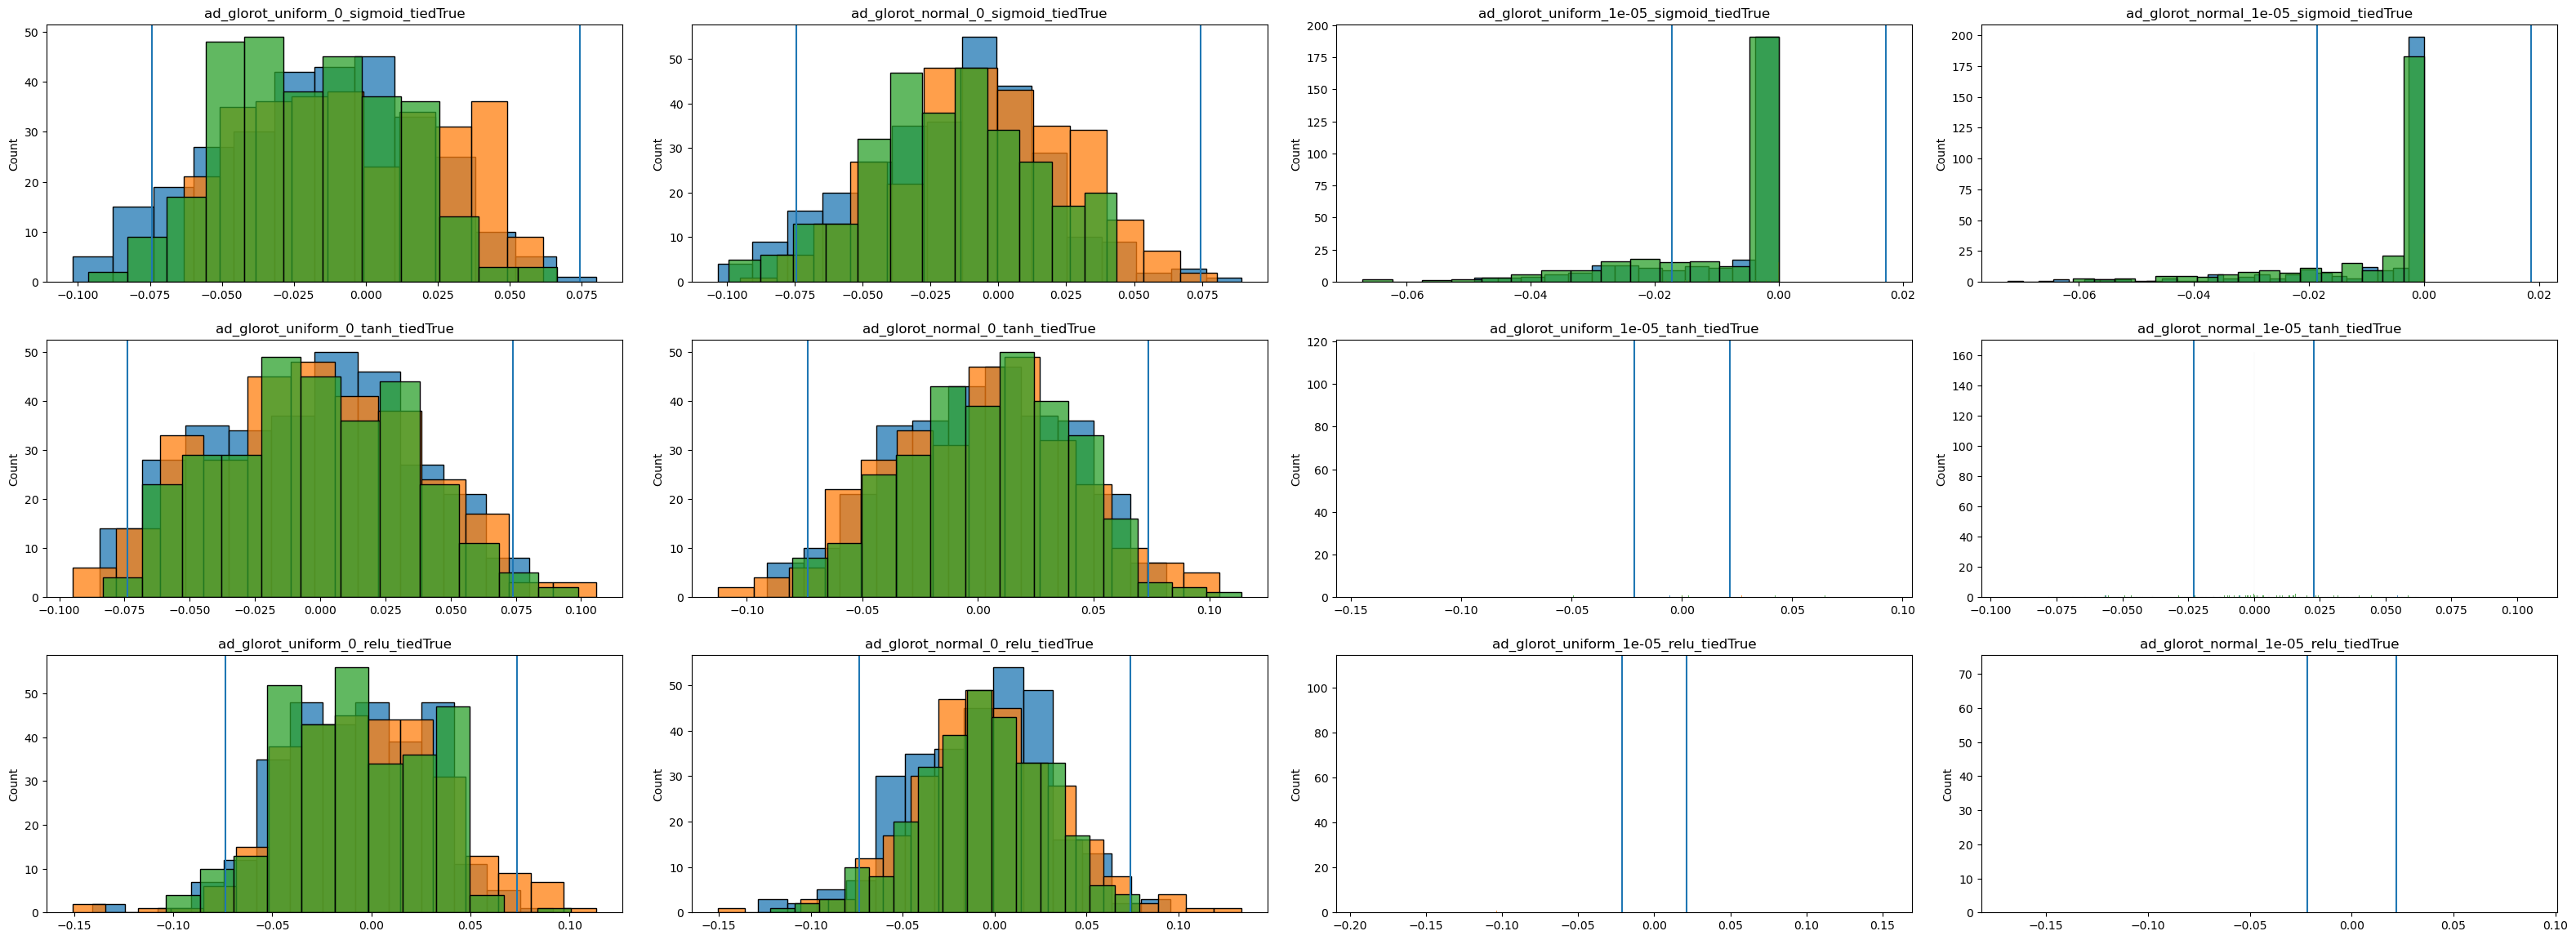

In [8]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_seq2[name]
                for node in range(0,3):
                    sns.histplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        #hist=True,
                        #rug=False,
                        kde=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


    

In [9]:
inits = ['glorot_uniform', 'glorot_normal']
L1_norm = [0, 1e-5]
L2_norm = [0, 1e-5]
act_fun = ['sigmoid', 'tanh','relu']
tied = [True, False]


model_dict_pan2 = {
    "tf_adage": tf_adage
}

for seed in range(1):
    for i in inits:
    #print(i)
        for l in L1_norm:
        #print(l)
            for a in act_fun:
            #print(a)
                for t in tied:
                    name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t)
                    print(name)
                    mseq = run_model.run_model('../data_files/se_pandb1282_epi_comp_log_counts_norm_01.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)
                    #marr = run_model.run_model('../data_files/train_set_normalized.csv',seed=seed+560,kl1=l, act = a, tied = t, epochs=300, init=i, lr = 0.1)

                    #model_dict2[name] = marr
                    model_dict_pan2[name] = mseq

ad_glorot_uniform_0_sigmoid_tiedTrue
Epoch 1/300
16/16 [==============================] - 0s 17ms/step - loss: 0.6920 - val_loss: 0.6866
Epoch 2/300
16/16 [==============================] - 0s 12ms/step - loss: 0.6815 - val_loss: 0.6753
Epoch 3/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6706 - val_loss: 0.6646
Epoch 4/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6596 - val_loss: 0.6528
Epoch 5/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6467 - val_loss: 0.6385
Epoch 6/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6309 - val_loss: 0.6211
Epoch 7/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6119 - val_loss: 0.6009
Epoch 8/300
16/16 [==============================] - 0s 10ms/step - loss: 0.5907 - val_loss: 0.5792
Epoch 9/300
16/16 [==============================] - 0s 10ms/step - loss: 0.5686 - val_loss: 0.5571
Epoch 10/300
16/16 [==============================] - 0s 11ms/s

Epoch 82/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2564 - val_loss: 0.2534
Epoch 83/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2559 - val_loss: 0.2529
Epoch 84/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2554 - val_loss: 0.2524
Epoch 85/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2549 - val_loss: 0.2520
Epoch 86/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2544 - val_loss: 0.2515
Epoch 87/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2539 - val_loss: 0.2510
Epoch 88/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2535 - val_loss: 0.2505
Epoch 89/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2530 - val_loss: 0.2501
Epoch 90/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2526 - val_loss: 0.2496
Epoch 91/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2521 - val_los

16/16 [==============================] - 0s 10ms/step - loss: 0.2249 - val_loss: 0.2235
Epoch 163/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2244 - val_loss: 0.2230
Epoch 164/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2238 - val_loss: 0.2225
Epoch 165/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2233 - val_loss: 0.2219
Epoch 166/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2227 - val_loss: 0.2214
Epoch 167/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2221 - val_loss: 0.2208
Epoch 168/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2215 - val_loss: 0.2201
Epoch 169/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2208 - val_loss: 0.2194
Epoch 170/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2201 - val_loss: 0.2187
Epoch 171/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2194 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1401 - val_loss: 0.1363
Epoch 243/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1397 - val_loss: 0.1359
Epoch 244/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1393 - val_loss: 0.1355
Epoch 245/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1389 - val_loss: 0.1351
Epoch 246/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1385 - val_loss: 0.1348
Epoch 247/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1382 - val_loss: 0.1344
Epoch 248/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1378 - val_loss: 0.1340
Epoch 249/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1375 - val_loss: 0.1337
Epoch 250/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1371 - val_loss: 0.1333
Epoch 251/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1368 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2667 - val_loss: 0.2609
Epoch 23/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2597 - val_loss: 0.2542
Epoch 24/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2533 - val_loss: 0.2480
Epoch 25/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2474 - val_loss: 0.2423
Epoch 26/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2420 - val_loss: 0.2371
Epoch 27/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2370 - val_loss: 0.2322
Epoch 28/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2323 - val_loss: 0.2277
Epoch 29/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2280 - val_loss: 0.2235
Epoch 30/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2240 - val_loss: 0.2196
Epoch 31/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2202 - val_loss: 0.2159
Epo

16/16 [==============================] - 0s 9ms/step - loss: 0.1468 - val_loss: 0.1432
Epoch 104/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1465 - val_loss: 0.1429
Epoch 105/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1462 - val_loss: 0.1426
Epoch 106/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1460 - val_loss: 0.1424
Epoch 107/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1457 - val_loss: 0.1421
Epoch 108/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1455 - val_loss: 0.1419
Epoch 109/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1452 - val_loss: 0.1416
Epoch 110/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1450 - val_loss: 0.1414
Epoch 111/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1447 - val_loss: 0.1411
Epoch 112/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1445 - val_loss: 0.1409
Epoc

16/16 [==============================] - 0s 10ms/step - loss: 0.1350 - val_loss: 0.1312
Epoch 185/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1349 - val_loss: 0.1311
Epoch 186/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1348 - val_loss: 0.1310
Epoch 187/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1347 - val_loss: 0.1310
Epoch 188/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1347 - val_loss: 0.1309
Epoch 189/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1346 - val_loss: 0.1308
Epoch 190/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1345 - val_loss: 0.1307
Epoch 191/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1345 - val_loss: 0.1307
Epoch 192/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1344 - val_loss: 0.1306
Epoch 193/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1343 - val_loss: 0.1305

16/16 [==============================] - 0s 9ms/step - loss: 0.1308 - val_loss: 0.1269
Epoch 266/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1307 - val_loss: 0.1268
Epoch 267/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1307 - val_loss: 0.1268
Epoch 268/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1307 - val_loss: 0.1268
Epoch 269/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1306 - val_loss: 0.1267
Epoch 270/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1306 - val_loss: 0.1267
Epoch 271/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1306 - val_loss: 0.1267
Epoch 272/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1305 - val_loss: 0.1266
Epoch 273/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1305 - val_loss: 0.1266
Epoch 274/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1305 - val_loss: 0.1266
E

Epoch 46/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2959 - val_loss: 0.2908
Epoch 47/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2949 - val_loss: 0.2901
Epoch 48/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2939 - val_loss: 0.2889
Epoch 49/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2930 - val_loss: 0.2874
Epoch 50/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2928 - val_loss: 0.2887
Epoch 51/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2915 - val_loss: 0.2865
Epoch 52/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2904 - val_loss: 0.2847
Epoch 53/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2897 - val_loss: 0.2844
Epoch 54/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2891 - val_loss: 0.2834
Epoch 55/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2904 - val_los

Epoch 127/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2694 - val_loss: 0.2644
Epoch 128/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2692 - val_loss: 0.2628
Epoch 129/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2690 - val_loss: 0.2635
Epoch 130/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2688 - val_loss: 0.2629
Epoch 131/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2687 - val_loss: 0.2630
Epoch 132/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2686 - val_loss: 0.2627
Epoch 133/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2688 - val_loss: 0.2640
Epoch 134/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2684 - val_loss: 0.2626
Epoch 135/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2682 - val_loss: 0.2627
Epoch 136/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2681

16/16 [==============================] - 0s 10ms/step - loss: 0.2610 - val_loss: 0.2561
Epoch 208/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2610 - val_loss: 0.2567
Epoch 209/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2608 - val_loss: 0.2560
Epoch 210/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2607 - val_loss: 0.2555
Epoch 211/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2606 - val_loss: 0.2560
Epoch 212/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2605 - val_loss: 0.2555
Epoch 213/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2604 - val_loss: 0.2554
Epoch 214/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2604 - val_loss: 0.2551
Epoch 215/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2603 - val_loss: 0.2556
Epoch 216/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2602 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.2555 - val_loss: 0.2516
Epoch 288/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2555 - val_loss: 0.2514
Epoch 289/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2555 - val_loss: 0.2510
Epoch 290/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2554 - val_loss: 0.2518
Epoch 291/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2553 - val_loss: 0.2516
Epoch 292/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2553 - val_loss: 0.2512
Epoch 293/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2552 - val_loss: 0.2513
Epoch 294/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2552 - val_loss: 0.2514
Epoch 295/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2551 - val_loss: 0.2510
Epoch 296/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2551 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1617 - val_loss: 0.1581
Epoch 69/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1610 - val_loss: 0.1575
Epoch 70/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1604 - val_loss: 0.1568
Epoch 71/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1598 - val_loss: 0.1562
Epoch 72/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1592 - val_loss: 0.1556
Epoch 73/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1586 - val_loss: 0.1550
Epoch 74/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1580 - val_loss: 0.1545
Epoch 75/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1575 - val_loss: 0.1539
Epoch 76/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1569 - val_loss: 0.1534
Epoch 77/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1564 - val_loss: 0.1529
Epoch 78/3

16/16 [==============================] - 0s 11ms/step - loss: 0.1384 - val_loss: 0.1346
Epoch 150/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1382 - val_loss: 0.1345
Epoch 151/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1381 - val_loss: 0.1344
Epoch 152/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1380 - val_loss: 0.1343
Epoch 153/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1379 - val_loss: 0.1341
Epoch 154/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1378 - val_loss: 0.1340
Epoch 155/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1377 - val_loss: 0.1339
Epoch 156/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1375 - val_loss: 0.1338
Epoch 157/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1374 - val_loss: 0.1337
Epoch 158/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1373 - val_loss: 0

Epoch 230/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1322 - val_loss: 0.1283
Epoch 231/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1321 - val_loss: 0.1283
Epoch 232/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1321 - val_loss: 0.1282
Epoch 233/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1320 - val_loss: 0.1282
Epoch 234/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1320 - val_loss: 0.1281
Epoch 235/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1320 - val_loss: 0.1281
Epoch 236/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1319 - val_loss: 0.1281
Epoch 237/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1319 - val_loss: 0.1280
Epoch 238/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1318 - val_loss: 0.1280
Epoch 239/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1318 - val_l

16/16 [==============================] - 0s 11ms/step - loss: 0.4188 - val_loss: 0.4051
Epoch 11/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3923 - val_loss: 0.3832
Epoch 12/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3740 - val_loss: 0.3676
Epoch 13/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3608 - val_loss: 0.3559
Epoch 14/300
16/16 [==============================] - 0s 12ms/step - loss: 0.3509 - val_loss: 0.3466
Epoch 15/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3429 - val_loss: 0.3391
Epoch 16/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3365 - val_loss: 0.3329
Epoch 17/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3311 - val_loss: 0.3276
Epoch 18/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3266 - val_loss: 0.3231
Epoch 19/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3227 - val_loss: 0.3191
Epo

16/16 [==============================] - 0s 10ms/step - loss: 0.2739 - val_loss: 0.2663
Epoch 92/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2737 - val_loss: 0.2662
Epoch 93/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2734 - val_loss: 0.2657
Epoch 94/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2736 - val_loss: 0.2656
Epoch 95/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2735 - val_loss: 0.2660
Epoch 96/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2730 - val_loss: 0.2653
Epoch 97/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2729 - val_loss: 0.2656
Epoch 98/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2725 - val_loss: 0.2651
Epoch 99/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2723 - val_loss: 0.2648
Epoch 100/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2721 - val_loss: 0.2650
Ep

16/16 [==============================] - 0s 10ms/step - loss: 0.2587 - val_loss: 0.2539
Epoch 172/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2585 - val_loss: 0.2535
Epoch 173/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2582 - val_loss: 0.2531
Epoch 174/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2580 - val_loss: 0.2533
Epoch 175/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2577 - val_loss: 0.2528
Epoch 176/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2575 - val_loss: 0.2527
Epoch 177/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2571 - val_loss: 0.2528
Epoch 178/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2569 - val_loss: 0.2521
Epoch 179/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2567 - val_loss: 0.2522
Epoch 180/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2566 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.2128 - val_loss: 0.2107
Epoch 252/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2118 - val_loss: 0.2098
Epoch 253/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2106 - val_loss: 0.2086
Epoch 254/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2095 - val_loss: 0.2075
Epoch 255/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2084 - val_loss: 0.2066
Epoch 256/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2074 - val_loss: 0.2054
Epoch 257/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2063 - val_loss: 0.2046
Epoch 258/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2053 - val_loss: 0.2033
Epoch 259/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2042 - val_loss: 0.2023
Epoch 260/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2031 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1239 - val_loss: 0.1200
Epoch 32/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1238 - val_loss: 0.1198
Epoch 33/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1238 - val_loss: 0.1198
Epoch 34/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1237 - val_loss: 0.1197
Epoch 35/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1237 - val_loss: 0.1197
Epoch 36/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1237 - val_loss: 0.1198
Epoch 37/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1236 - val_loss: 0.1198
Epoch 38/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1236 - val_loss: 0.1196
Epoch 39/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1236 - val_loss: 0.1197
Epoch 40/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1236 - val_loss: 0.1196
Epoch 41

16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 113/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 114/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1194
Epoch 115/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 116/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1230 - val_loss: 0.1192
Epoch 117/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 118/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1193
Epoch 119/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1230 - val_loss: 0.1194
Epoch 120/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 121/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1229 - val_loss: 0.11

16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1192
Epoch 194/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 195/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1194
Epoch 196/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1192
Epoch 197/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 198/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 199/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 200/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1192
Epoch 201/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1227 - val_loss: 0.1192
Epoch 202/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1193
Epo

Epoch 274/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1194
Epoch 275/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 276/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 277/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 278/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1192
Epoch 279/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 280/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1225 - val_loss: 0.1194
Epoch 281/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1192
Epoch 282/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1225 - val_loss: 0.1191
Epoch 283/300
16/16 [==============================] - 0s 9ms/step - loss: 0.1225 - val

16/16 [==============================] - 0s 13ms/step - loss: 0.5665 - val_loss: 0.5650
Epoch 55/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5643 - val_loss: 0.5629
Epoch 56/300
16/16 [==============================] - 0s 22ms/step - loss: 0.5623 - val_loss: 0.5610
Epoch 57/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5604 - val_loss: 0.5592
Epoch 58/300
16/16 [==============================] - 0s 15ms/step - loss: 0.5587 - val_loss: 0.5575
Epoch 59/300
16/16 [==============================] - 0s 20ms/step - loss: 0.5571 - val_loss: 0.5560
Epoch 60/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5556 - val_loss: 0.5546
Epoch 61/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5542 - val_loss: 0.5532
Epoch 62/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5529 - val_loss: 0.5519
Epoch 63/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5517 - val_loss: 0.5507
Epo

Epoch 135/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5026 - val_loss: 0.5016
Epoch 136/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5021 - val_loss: 0.5011
Epoch 137/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5016 - val_loss: 0.5007
Epoch 138/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5012 - val_loss: 0.5002
Epoch 139/300
16/16 [==============================] - 0s 12ms/step - loss: 0.5008 - val_loss: 0.4998
Epoch 140/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5003 - val_loss: 0.4993
Epoch 141/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4999 - val_loss: 0.4989
Epoch 142/300
16/16 [==============================] - 0s 12ms/step - loss: 0.4994 - val_loss: 0.4985
Epoch 143/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4990 - val_loss: 0.4980
Epoch 144/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4985

16/16 [==============================] - 0s 13ms/step - loss: 0.4677 - val_loss: 0.4664
Epoch 216/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4673 - val_loss: 0.4659
Epoch 217/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4668 - val_loss: 0.4654
Epoch 218/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4663 - val_loss: 0.4649
Epoch 219/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4658 - val_loss: 0.4644
Epoch 220/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4653 - val_loss: 0.4639
Epoch 221/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4647 - val_loss: 0.4634
Epoch 222/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4642 - val_loss: 0.4629
Epoch 223/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4637 - val_loss: 0.4624
Epoch 224/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4632 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.4072 - val_loss: 0.4049
Epoch 296/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4062 - val_loss: 0.4039
Epoch 297/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4052 - val_loss: 0.4029
Epoch 298/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4043 - val_loss: 0.4019
Epoch 299/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4033 - val_loss: 0.4009
Epoch 300/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4023 - val_loss: 0.4000
ad_glorot_uniform_1e-05_sigmoid_tiedFalse
Epoch 1/300
16/16 [==============================] - 0s 15ms/step - loss: 1.1516 - val_loss: 1.1428
Epoch 2/300
16/16 [==============================] - 0s 12ms/step - loss: 1.1331 - val_loss: 1.1202
Epoch 3/300
16/16 [==============================] - 0s 12ms/step - loss: 1.1085 - val_loss: 1.0931
Epoch 4/300
16/16 [==============================] - 0s 12ms

Epoch 76/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2386 - val_loss: 0.2340
Epoch 77/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2355 - val_loss: 0.2309
Epoch 78/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2325 - val_loss: 0.2280
Epoch 79/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2296 - val_loss: 0.2251
Epoch 80/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2267 - val_loss: 0.2223
Epoch 81/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2240 - val_loss: 0.2195
Epoch 82/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2212 - val_loss: 0.2168
Epoch 83/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2186 - val_loss: 0.2142
Epoch 84/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2161 - val_loss: 0.2117
Epoch 85/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2136 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.1574 - val_loss: 0.1540
Epoch 157/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1572 - val_loss: 0.1538
Epoch 158/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1570 - val_loss: 0.1536
Epoch 159/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1569 - val_loss: 0.1534
Epoch 160/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1567 - val_loss: 0.1533
Epoch 161/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1565 - val_loss: 0.1531
Epoch 162/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1564 - val_loss: 0.1529
Epoch 163/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1562 - val_loss: 0.1528
Epoch 164/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1561 - val_loss: 0.1526
Epoch 165/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1559 - val_loss: 0

16/16 [==============================] - 0s 12ms/step - loss: 0.1482 - val_loss: 0.1446
Epoch 237/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1481 - val_loss: 0.1445
Epoch 238/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1481 - val_loss: 0.1445
Epoch 239/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1480 - val_loss: 0.1444
Epoch 240/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1479 - val_loss: 0.1443
Epoch 241/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1478 - val_loss: 0.1442
Epoch 242/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1478 - val_loss: 0.1442
Epoch 243/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1477 - val_loss: 0.1441
Epoch 244/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1476 - val_loss: 0.1440
Epoch 245/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1475 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.8289 - val_loss: 0.8194
Epoch 17/300
16/16 [==============================] - 0s 13ms/step - loss: 0.8114 - val_loss: 0.8026
Epoch 18/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7954 - val_loss: 0.7870
Epoch 19/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7805 - val_loss: 0.7727
Epoch 20/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7668 - val_loss: 0.7594
Epoch 21/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7541 - val_loss: 0.7470
Epoch 22/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7423 - val_loss: 0.7355
Epoch 23/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7312 - val_loss: 0.7248
Epoch 24/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7210 - val_loss: 0.7146
Epoch 25/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7113 - val_loss: 0.7053
Epo

16/16 [==============================] - 0s 13ms/step - loss: 0.5235 - val_loss: 0.5210
Epoch 98/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5230 - val_loss: 0.5206
Epoch 99/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5226 - val_loss: 0.5202
Epoch 100/300
16/16 [==============================] - 0s 15ms/step - loss: 0.5220 - val_loss: 0.5196
Epoch 101/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5215 - val_loss: 0.5191
Epoch 102/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5210 - val_loss: 0.5187
Epoch 103/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5206 - val_loss: 0.5182
Epoch 104/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5201 - val_loss: 0.5177
Epoch 105/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5196 - val_loss: 0.5172
Epoch 106/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5192 - val_loss: 0.5

16/16 [==============================] - 0s 13ms/step - loss: 0.4940 - val_loss: 0.4910
Epoch 178/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4936 - val_loss: 0.4906
Epoch 179/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4933 - val_loss: 0.4903
Epoch 180/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4930 - val_loss: 0.4900
Epoch 181/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4927 - val_loss: 0.4897
Epoch 182/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4924 - val_loss: 0.4893
Epoch 183/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4921 - val_loss: 0.4890
Epoch 184/300
16/16 [==============================] - 0s 12ms/step - loss: 0.4918 - val_loss: 0.4888
Epoch 185/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4914 - val_loss: 0.4883
Epoch 186/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4911 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.4674 - val_loss: 0.4637
Epoch 258/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4670 - val_loss: 0.4634
Epoch 259/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4667 - val_loss: 0.4629
Epoch 260/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4663 - val_loss: 0.4625
Epoch 261/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4660 - val_loss: 0.4623
Epoch 262/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4656 - val_loss: 0.4620
Epoch 263/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4652 - val_loss: 0.4615
Epoch 264/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4649 - val_loss: 0.4611
Epoch 265/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4646 - val_loss: 0.4607
Epoch 266/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4642 - val_loss: 0

16/16 [==============================] - 0s 12ms/step - loss: 0.4336 - val_loss: 0.4268
Epoch 38/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4258 - val_loss: 0.4191
Epoch 39/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4182 - val_loss: 0.4116
Epoch 40/300
16/16 [==============================] - 0s 12ms/step - loss: 0.4108 - val_loss: 0.4043
Epoch 41/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4036 - val_loss: 0.3971
Epoch 42/300
16/16 [==============================] - 0s 12ms/step - loss: 0.3966 - val_loss: 0.3902
Epoch 43/300
16/16 [==============================] - 0s 12ms/step - loss: 0.3898 - val_loss: 0.3834
Epoch 44/300
16/16 [==============================] - 0s 12ms/step - loss: 0.3831 - val_loss: 0.3767
Epoch 45/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3765 - val_loss: 0.3703
Epoch 46/300
16/16 [==============================] - 0s 12ms/step - loss: 0.3701 - val_loss: 0.3639
Epo

16/16 [==============================] - 0s 12ms/step - loss: 0.1610 - val_loss: 0.1575
Epoch 119/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1605 - val_loss: 0.1570
Epoch 120/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1600 - val_loss: 0.1565
Epoch 121/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1596 - val_loss: 0.1561
Epoch 122/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1592 - val_loss: 0.1557
Epoch 123/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1588 - val_loss: 0.1553
Epoch 124/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1584 - val_loss: 0.1549
Epoch 125/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1581 - val_loss: 0.1546
Epoch 126/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1577 - val_loss: 0.1543
Epoch 127/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1574 - val_loss: 0

16/16 [==============================] - 0s 12ms/step - loss: 0.1470 - val_loss: 0.1433
Epoch 199/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1469 - val_loss: 0.1432
Epoch 200/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1468 - val_loss: 0.1432
Epoch 201/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1467 - val_loss: 0.1431
Epoch 202/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1466 - val_loss: 0.1430
Epoch 203/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1465 - val_loss: 0.1429
Epoch 204/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1464 - val_loss: 0.1428
Epoch 205/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1463 - val_loss: 0.1427
Epoch 206/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1462 - val_loss: 0.1426
Epoch 207/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1462 - val_loss: 0

16/16 [==============================] - 0s 12ms/step - loss: 0.1417 - val_loss: 0.1379
Epoch 279/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1416 - val_loss: 0.1379
Epoch 280/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1416 - val_loss: 0.1378
Epoch 281/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1415 - val_loss: 0.1378
Epoch 282/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1415 - val_loss: 0.1377
Epoch 283/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1414 - val_loss: 0.1377
Epoch 284/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1414 - val_loss: 0.1376
Epoch 285/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1413 - val_loss: 0.1376
Epoch 286/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1413 - val_loss: 0.1375
Epoch 287/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1412 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.4883 - val_loss: 0.4825
Epoch 59/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4848 - val_loss: 0.4792
Epoch 60/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4814 - val_loss: 0.4757
Epoch 61/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4781 - val_loss: 0.4724
Epoch 62/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4748 - val_loss: 0.4690
Epoch 63/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4716 - val_loss: 0.4658
Epoch 64/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4683 - val_loss: 0.4627
Epoch 65/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4652 - val_loss: 0.4595
Epoch 66/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4621 - val_loss: 0.4564
Epoch 67/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4590 - val_loss: 0.4534
Epo

Epoch 139/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3562 - val_loss: 0.3504
Epoch 140/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3558 - val_loss: 0.3501
Epoch 141/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3553 - val_loss: 0.3495
Epoch 142/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3548 - val_loss: 0.3491
Epoch 143/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3546 - val_loss: 0.3485
Epoch 144/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3540 - val_loss: 0.3482
Epoch 145/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3536 - val_loss: 0.3480
Epoch 146/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3533 - val_loss: 0.3475
Epoch 147/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3527 - val_loss: 0.3468
Epoch 148/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3524

16/16 [==============================] - 0s 13ms/step - loss: 0.3300 - val_loss: 0.3235
Epoch 220/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3299 - val_loss: 0.3235
Epoch 221/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3295 - val_loss: 0.3228
Epoch 222/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3294 - val_loss: 0.3229
Epoch 223/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3291 - val_loss: 0.3224
Epoch 224/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3290 - val_loss: 0.3224
Epoch 225/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3286 - val_loss: 0.3221
Epoch 226/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3284 - val_loss: 0.3217
Epoch 227/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3282 - val_loss: 0.3216
Epoch 228/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3279 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.3162 - val_loss: 0.3090
Epoch 300/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3161 - val_loss: 0.3090
ad_glorot_uniform_1e-05_relu_tiedFalse
Epoch 1/300
16/16 [==============================] - 0s 22ms/step - loss: 1.1533 - val_loss: 1.1495
Epoch 2/300
16/16 [==============================] - 0s 13ms/step - loss: 1.1447 - val_loss: 1.1376
Epoch 3/300
16/16 [==============================] - 0s 13ms/step - loss: 1.1277 - val_loss: 1.1109
Epoch 4/300
16/16 [==============================] - 0s 14ms/step - loss: 1.0821 - val_loss: 1.0319
Epoch 5/300
16/16 [==============================] - 0s 13ms/step - loss: 0.9531 - val_loss: 0.8374
Epoch 6/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7335 - val_loss: 0.6347
Epoch 7/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5963 - val_loss: 0.5657
Epoch 8/300
16/16 [==============================] - 0s 13ms/step - los

Epoch 80/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1919 - val_loss: 0.1870
Epoch 81/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1894 - val_loss: 0.1845
Epoch 82/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1869 - val_loss: 0.1821
Epoch 83/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1845 - val_loss: 0.1797
Epoch 84/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1821 - val_loss: 0.1774
Epoch 85/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1799 - val_loss: 0.1752
Epoch 86/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1776 - val_loss: 0.1730
Epoch 87/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1755 - val_loss: 0.1708
Epoch 88/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1734 - val_loss: 0.1688
Epoch 89/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1714 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.1346 - val_loss: 0.1312
Epoch 161/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1346 - val_loss: 0.1311
Epoch 162/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1346 - val_loss: 0.1311
Epoch 163/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1345 - val_loss: 0.1310
Epoch 164/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1345 - val_loss: 0.1310
Epoch 165/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1344 - val_loss: 0.1309
Epoch 166/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1344 - val_loss: 0.1308
Epoch 167/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1343 - val_loss: 0.1308
Epoch 168/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1343 - val_loss: 0.1308
Epoch 169/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1342 - val_loss: 0

16/16 [==============================] - 0s 12ms/step - loss: 0.1319 - val_loss: 0.1284
Epoch 241/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1319 - val_loss: 0.1284
Epoch 242/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1318 - val_loss: 0.1284
Epoch 243/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1318 - val_loss: 0.1284
Epoch 244/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1318 - val_loss: 0.1284
Epoch 245/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1318 - val_loss: 0.1283
Epoch 246/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1318 - val_loss: 0.1283
Epoch 247/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1317 - val_loss: 0.1282
Epoch 248/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1317 - val_loss: 0.1282
Epoch 249/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1317 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.3911 - val_loss: 0.3865
Epoch 21/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3819 - val_loss: 0.3777
Epoch 22/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3735 - val_loss: 0.3697
Epoch 23/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3659 - val_loss: 0.3623
Epoch 24/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3589 - val_loss: 0.3555
Epoch 25/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3524 - val_loss: 0.3493
Epoch 26/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3466 - val_loss: 0.3436
Epoch 27/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3412 - val_loss: 0.3384
Epoch 28/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3362 - val_loss: 0.3335
Epoch 29/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3315 - val_loss: 0.3290
Epo

16/16 [==============================] - 0s 11ms/step - loss: 0.2479 - val_loss: 0.2455
Epoch 102/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2475 - val_loss: 0.2451
Epoch 103/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2471 - val_loss: 0.2447
Epoch 104/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2467 - val_loss: 0.2443
Epoch 105/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2463 - val_loss: 0.2440
Epoch 106/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2460 - val_loss: 0.2436
Epoch 107/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2456 - val_loss: 0.2432
Epoch 108/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2452 - val_loss: 0.2429
Epoch 109/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2448 - val_loss: 0.2425
Epoch 110/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2445 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2091 - val_loss: 0.2074
Epoch 182/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2077 - val_loss: 0.2060
Epoch 183/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2063 - val_loss: 0.2045
Epoch 184/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2048 - val_loss: 0.2029
Epoch 185/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2033 - val_loss: 0.2013
Epoch 186/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2018 - val_loss: 0.1997
Epoch 187/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2001 - val_loss: 0.1980
Epoch 188/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1985 - val_loss: 0.1962
Epoch 189/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1968 - val_loss: 0.1945
Epoch 190/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1951 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.1338 - val_loss: 0.1300
Epoch 262/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1336 - val_loss: 0.1298
Epoch 263/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1333 - val_loss: 0.1295
Epoch 264/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1331 - val_loss: 0.1293
Epoch 265/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1329 - val_loss: 0.1291
Epoch 266/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1327 - val_loss: 0.1289
Epoch 267/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1325 - val_loss: 0.1287
Epoch 268/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1323 - val_loss: 0.1285
Epoch 269/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1321 - val_loss: 0.1283
Epoch 270/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1319 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1931 - val_loss: 0.1894
Epoch 42/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1912 - val_loss: 0.1875
Epoch 43/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1893 - val_loss: 0.1856
Epoch 44/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1876 - val_loss: 0.1839
Epoch 45/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1859 - val_loss: 0.1822
Epoch 46/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1843 - val_loss: 0.1806
Epoch 47/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1828 - val_loss: 0.1791
Epoch 48/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1813 - val_loss: 0.1777
Epoch 49/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1799 - val_loss: 0.1763
Epoch 50/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1786 - val_loss: 0.1750
Epo

16/16 [==============================] - 0s 10ms/step - loss: 0.1424 - val_loss: 0.1388
Epoch 123/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1423 - val_loss: 0.1386
Epoch 124/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1421 - val_loss: 0.1384
Epoch 125/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1419 - val_loss: 0.1382
Epoch 126/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1417 - val_loss: 0.1381
Epoch 127/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1415 - val_loss: 0.1379
Epoch 128/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1414 - val_loss: 0.1377
Epoch 129/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1412 - val_loss: 0.1375
Epoch 130/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1410 - val_loss: 0.1374
Epoch 131/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1409 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1337 - val_loss: 0.1299
Epoch 203/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1337 - val_loss: 0.1299
Epoch 204/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1336 - val_loss: 0.1298
Epoch 205/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1335 - val_loss: 0.1297
Epoch 206/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1335 - val_loss: 0.1297
Epoch 207/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1334 - val_loss: 0.1296
Epoch 208/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1334 - val_loss: 0.1295
Epoch 209/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1333 - val_loss: 0.1295
Epoch 210/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1332 - val_loss: 0.1294
Epoch 211/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1332 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1302 - val_loss: 0.1263
Epoch 283/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1302 - val_loss: 0.1263
Epoch 284/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1301 - val_loss: 0.1263
Epoch 285/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1301 - val_loss: 0.1262
Epoch 286/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1301 - val_loss: 0.1262
Epoch 287/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1301 - val_loss: 0.1262
Epoch 288/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1300 - val_loss: 0.1261
Epoch 289/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1300 - val_loss: 0.1261
Epoch 290/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1300 - val_loss: 0.1261
Epoch 291/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1299 - val_loss: 0

Epoch 63/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2835 - val_loss: 0.2783
Epoch 64/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2831 - val_loss: 0.2771
Epoch 65/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2826 - val_loss: 0.2770
Epoch 66/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2822 - val_loss: 0.2768
Epoch 67/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2818 - val_loss: 0.2763
Epoch 68/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2814 - val_loss: 0.2758
Epoch 69/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2811 - val_loss: 0.2753
Epoch 70/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2807 - val_loss: 0.2750
Epoch 71/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2803 - val_loss: 0.2745
Epoch 72/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2802 - val_los

16/16 [==============================] - 0s 11ms/step - loss: 0.2673 - val_loss: 0.2618
Epoch 144/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2671 - val_loss: 0.2616
Epoch 145/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2674 - val_loss: 0.2610
Epoch 146/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2673 - val_loss: 0.2637
Epoch 147/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2675 - val_loss: 0.2628
Epoch 148/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2669 - val_loss: 0.2622
Epoch 149/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2666 - val_loss: 0.2610
Epoch 150/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2664 - val_loss: 0.2608
Epoch 151/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2663 - val_loss: 0.2611
Epoch 152/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2662 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2596 - val_loss: 0.2550
Epoch 224/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2595 - val_loss: 0.2558
Epoch 225/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2595 - val_loss: 0.2549
Epoch 226/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2594 - val_loss: 0.2554
Epoch 227/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2593 - val_loss: 0.2548
Epoch 228/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2592 - val_loss: 0.2545
Epoch 229/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2591 - val_loss: 0.2542
Epoch 230/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2591 - val_loss: 0.2544
Epoch 231/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2590 - val_loss: 0.2546
Epoch 232/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2589 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.6766 - val_loss: 0.6663
Epoch 4/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6540 - val_loss: 0.6373
Epoch 5/300
16/16 [==============================] - 0s 10ms/step - loss: 0.6210 - val_loss: 0.6004
Epoch 6/300
16/16 [==============================] - 0s 10ms/step - loss: 0.5828 - val_loss: 0.5612
Epoch 7/300
16/16 [==============================] - 0s 11ms/step - loss: 0.5443 - val_loss: 0.5235
Epoch 8/300
16/16 [==============================] - 0s 10ms/step - loss: 0.5080 - val_loss: 0.4888
Epoch 9/300
16/16 [==============================] - 0s 10ms/step - loss: 0.4751 - val_loss: 0.4578
Epoch 10/300
16/16 [==============================] - 0s 10ms/step - loss: 0.4458 - val_loss: 0.4302
Epoch 11/300
16/16 [==============================] - 0s 10ms/step - loss: 0.4198 - val_loss: 0.4057
Epoch 12/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3967 - val_loss: 0.3841
Epoch 13/

16/16 [==============================] - 0s 10ms/step - loss: 0.1532 - val_loss: 0.1497
Epoch 85/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1528 - val_loss: 0.1493
Epoch 86/300
16/16 [==============================] - 0s 17ms/step - loss: 0.1524 - val_loss: 0.1488
Epoch 87/300
16/16 [==============================] - 0s 19ms/step - loss: 0.1520 - val_loss: 0.1484
Epoch 88/300
16/16 [==============================] - 0s 20ms/step - loss: 0.1516 - val_loss: 0.1480
Epoch 89/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1513 - val_loss: 0.1477
Epoch 90/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1509 - val_loss: 0.1473
Epoch 91/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1505 - val_loss: 0.1469
Epoch 92/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1502 - val_loss: 0.1466
Epoch 93/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1498 - val_loss: 0.1462
Epo

16/16 [==============================] - 0s 10ms/step - loss: 0.1367 - val_loss: 0.1330
Epoch 165/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1366 - val_loss: 0.1329
Epoch 166/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1365 - val_loss: 0.1328
Epoch 167/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1364 - val_loss: 0.1327
Epoch 168/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1363 - val_loss: 0.1326
Epoch 169/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1362 - val_loss: 0.1325
Epoch 170/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1362 - val_loss: 0.1324
Epoch 171/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1361 - val_loss: 0.1323
Epoch 172/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1360 - val_loss: 0.1322
Epoch 173/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1359 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1316 - val_loss: 0.1277
Epoch 245/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1315 - val_loss: 0.1277
Epoch 246/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1315 - val_loss: 0.1276
Epoch 247/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1314 - val_loss: 0.1276
Epoch 248/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1314 - val_loss: 0.1275
Epoch 249/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1314 - val_loss: 0.1275
Epoch 250/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1313 - val_loss: 0.1275
Epoch 251/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1313 - val_loss: 0.1274
Epoch 252/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1312 - val_loss: 0.1274
Epoch 253/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1312 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.3097 - val_loss: 0.3054
Epoch 25/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3077 - val_loss: 0.3032
Epoch 26/300
16/16 [==============================] - 0s 11ms/step - loss: 0.3060 - val_loss: 0.3013
Epoch 27/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3044 - val_loss: 0.2995
Epoch 28/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3029 - val_loss: 0.2977
Epoch 29/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3014 - val_loss: 0.2964
Epoch 30/300
16/16 [==============================] - 0s 10ms/step - loss: 0.3002 - val_loss: 0.2949
Epoch 31/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2992 - val_loss: 0.2936
Epoch 32/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2980 - val_loss: 0.2924
Epoch 33/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2968 - val_loss: 0.2910
Epo

16/16 [==============================] - 0s 10ms/step - loss: 0.2711 - val_loss: 0.2635
Epoch 106/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2708 - val_loss: 0.2633
Epoch 107/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2705 - val_loss: 0.2637
Epoch 108/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2702 - val_loss: 0.2629
Epoch 109/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2701 - val_loss: 0.2630
Epoch 110/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2699 - val_loss: 0.2627
Epoch 111/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2699 - val_loss: 0.2629
Epoch 112/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2695 - val_loss: 0.2626
Epoch 113/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2695 - val_loss: 0.2624
Epoch 114/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2692 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.2525 - val_loss: 0.2483
Epoch 186/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2522 - val_loss: 0.2479
Epoch 187/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2518 - val_loss: 0.2474
Epoch 188/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2514 - val_loss: 0.2474
Epoch 189/300
16/16 [==============================] - 0s 10ms/step - loss: 0.2509 - val_loss: 0.2468
Epoch 190/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2506 - val_loss: 0.2468
Epoch 191/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2502 - val_loss: 0.2460
Epoch 192/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2497 - val_loss: 0.2458
Epoch 193/300
16/16 [==============================] - 0s 11ms/step - loss: 0.2493 - val_loss: 0.2454
Epoch 194/300
16/16 [==============================] - 0s 14ms/step - loss: 0.2490 - val_loss: 0

16/16 [==============================] - 0s 11ms/step - loss: 0.1874 - val_loss: 0.1859
Epoch 266/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1863 - val_loss: 0.1848
Epoch 267/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1852 - val_loss: 0.1839
Epoch 268/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1841 - val_loss: 0.1827
Epoch 269/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1831 - val_loss: 0.1817
Epoch 270/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1820 - val_loss: 0.1807
Epoch 271/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1809 - val_loss: 0.1797
Epoch 272/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1798 - val_loss: 0.1785
Epoch 273/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1788 - val_loss: 0.1776
Epoch 274/300
16/16 [==============================] - 0s 11ms/step - loss: 0.1778 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1235 - val_loss: 0.1195
Epoch 46/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1235 - val_loss: 0.1195
Epoch 47/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1234 - val_loss: 0.1195
Epoch 48/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1234 - val_loss: 0.1196
Epoch 49/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1234 - val_loss: 0.1195
Epoch 50/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1234 - val_loss: 0.1195
Epoch 51/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1234 - val_loss: 0.1195
Epoch 52/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1234 - val_loss: 0.1196
Epoch 53/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1233 - val_loss: 0.1195
Epoch 54/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1233 - val_loss: 0.1195
Epo

Epoch 126/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1194
Epoch 127/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 128/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 129/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1194
Epoch 130/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1194
Epoch 131/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 132/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 133/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 134/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229 - val_loss: 0.1193
Epoch 135/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1229

16/16 [==============================] - 0s 11ms/step - loss: 0.1227 - val_loss: 0.1192
Epoch 207/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 208/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1194
Epoch 209/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 210/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 211/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 212/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 213/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 214/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1227 - val_loss: 0.1193
Epoch 215/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1226 - val_loss: 0

16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1193
Epoch 287/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1193
Epoch 288/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1193
Epoch 289/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1191
Epoch 290/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1225 - val_loss: 0.1193
Epoch 291/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1194
Epoch 292/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1192
Epoch 293/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1192
Epoch 294/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0.1193
Epoch 295/300
16/16 [==============================] - 0s 10ms/step - loss: 0.1224 - val_loss: 0

Epoch 67/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5502 - val_loss: 0.5491
Epoch 68/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5487 - val_loss: 0.5477
Epoch 69/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5473 - val_loss: 0.5463
Epoch 70/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5460 - val_loss: 0.5449
Epoch 71/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5447 - val_loss: 0.5437
Epoch 72/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5434 - val_loss: 0.5424
Epoch 73/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5422 - val_loss: 0.5413
Epoch 74/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5411 - val_loss: 0.5401
Epoch 75/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5400 - val_loss: 0.5391
Epoch 76/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5389 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.4968 - val_loss: 0.4958
Epoch 148/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4964 - val_loss: 0.4954
Epoch 149/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4960 - val_loss: 0.4950
Epoch 150/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4955 - val_loss: 0.4945
Epoch 151/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4951 - val_loss: 0.4941
Epoch 152/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4947 - val_loss: 0.4936
Epoch 153/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4942 - val_loss: 0.4932
Epoch 154/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4938 - val_loss: 0.4928
Epoch 155/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4934 - val_loss: 0.4923
Epoch 156/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4929 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.4607 - val_loss: 0.4594
Epoch 228/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4602 - val_loss: 0.4588
Epoch 229/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4596 - val_loss: 0.4582
Epoch 230/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4591 - val_loss: 0.4577
Epoch 231/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4585 - val_loss: 0.4571
Epoch 232/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4579 - val_loss: 0.4565
Epoch 233/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4573 - val_loss: 0.4559
Epoch 234/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4567 - val_loss: 0.4553
Epoch 235/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4561 - val_loss: 0.4547
Epoch 236/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4555 - val_loss: 0

16/16 [==============================] - 0s 14ms/step - loss: 0.9364 - val_loss: 0.9127
Epoch 8/300
16/16 [==============================] - 0s 13ms/step - loss: 0.8940 - val_loss: 0.8717
Epoch 9/300
16/16 [==============================] - 0s 13ms/step - loss: 0.8547 - val_loss: 0.8342
Epoch 10/300
16/16 [==============================] - 0s 13ms/step - loss: 0.8190 - val_loss: 0.8004
Epoch 11/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7868 - val_loss: 0.7698
Epoch 12/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7577 - val_loss: 0.7420
Epoch 13/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7313 - val_loss: 0.7169
Epoch 14/300
16/16 [==============================] - 0s 13ms/step - loss: 0.7072 - val_loss: 0.6939
Epoch 15/300
16/16 [==============================] - 0s 12ms/step - loss: 0.6852 - val_loss: 0.6727
Epoch 16/300
16/16 [==============================] - 0s 13ms/step - loss: 0.6649 - val_loss: 0.6532
Epoch

16/16 [==============================] - 0s 14ms/step - loss: 0.2192 - val_loss: 0.2151
Epoch 89/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2172 - val_loss: 0.2131
Epoch 90/300
16/16 [==============================] - 0s 12ms/step - loss: 0.2152 - val_loss: 0.2112
Epoch 91/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2133 - val_loss: 0.2093
Epoch 92/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2115 - val_loss: 0.2075
Epoch 93/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2097 - val_loss: 0.2057
Epoch 94/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2079 - val_loss: 0.2039
Epoch 95/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2062 - val_loss: 0.2022
Epoch 96/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2045 - val_loss: 0.2006
Epoch 97/300
16/16 [==============================] - 0s 13ms/step - loss: 0.2029 - val_loss: 0.1990
Epo

16/16 [==============================] - 0s 12ms/step - loss: 0.1558 - val_loss: 0.1524
Epoch 169/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1557 - val_loss: 0.1522
Epoch 170/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1555 - val_loss: 0.1521
Epoch 171/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1554 - val_loss: 0.1519
Epoch 172/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1552 - val_loss: 0.1518
Epoch 173/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1551 - val_loss: 0.1516
Epoch 174/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1549 - val_loss: 0.1515
Epoch 175/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1548 - val_loss: 0.1513
Epoch 176/300
16/16 [==============================] - 0s 16ms/step - loss: 0.1546 - val_loss: 0.1512
Epoch 177/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1545 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.1475 - val_loss: 0.1439
Epoch 249/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1474 - val_loss: 0.1438
Epoch 250/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1474 - val_loss: 0.1437
Epoch 251/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1473 - val_loss: 0.1437
Epoch 252/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1472 - val_loss: 0.1436
Epoch 253/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1472 - val_loss: 0.1435
Epoch 254/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1471 - val_loss: 0.1435
Epoch 255/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1470 - val_loss: 0.1434
Epoch 256/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1469 - val_loss: 0.1433
Epoch 257/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1469 - val_loss: 0

16/16 [==============================] - 0s 14ms/step - loss: 0.6836 - val_loss: 0.6786
Epoch 29/300
16/16 [==============================] - 0s 15ms/step - loss: 0.6767 - val_loss: 0.6718
Epoch 30/300
16/16 [==============================] - 0s 14ms/step - loss: 0.6703 - val_loss: 0.6655
Epoch 31/300
16/16 [==============================] - 0s 15ms/step - loss: 0.6640 - val_loss: 0.6592
Epoch 32/300
16/16 [==============================] - 0s 15ms/step - loss: 0.6581 - val_loss: 0.6535
Epoch 33/300
16/16 [==============================] - 0s 15ms/step - loss: 0.6525 - val_loss: 0.6479
Epoch 34/300
16/16 [==============================] - 0s 14ms/step - loss: 0.6471 - val_loss: 0.6427
Epoch 35/300
16/16 [==============================] - 0s 14ms/step - loss: 0.6420 - val_loss: 0.6375
Epoch 36/300
16/16 [==============================] - 0s 14ms/step - loss: 0.6370 - val_loss: 0.6327
Epoch 37/300
16/16 [==============================] - 0s 16ms/step - loss: 0.6323 - val_loss: 0.6280
Epo

16/16 [==============================] - 0s 14ms/step - loss: 0.5176 - val_loss: 0.5151
Epoch 110/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5171 - val_loss: 0.5147
Epoch 111/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5166 - val_loss: 0.5142
Epoch 112/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5162 - val_loss: 0.5138
Epoch 113/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5158 - val_loss: 0.5134
Epoch 114/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5153 - val_loss: 0.5129
Epoch 115/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5149 - val_loss: 0.5125
Epoch 116/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5145 - val_loss: 0.5120
Epoch 117/300
16/16 [==============================] - 0s 13ms/step - loss: 0.5141 - val_loss: 0.5116
Epoch 118/300
16/16 [==============================] - 0s 14ms/step - loss: 0.5137 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.4897 - val_loss: 0.4866
Epoch 190/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4894 - val_loss: 0.4863
Epoch 191/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4891 - val_loss: 0.4860
Epoch 192/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4888 - val_loss: 0.4857
Epoch 193/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4885 - val_loss: 0.4854
Epoch 194/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4881 - val_loss: 0.4850
Epoch 195/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4879 - val_loss: 0.4849
Epoch 196/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4876 - val_loss: 0.4844
Epoch 197/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4872 - val_loss: 0.4844
Epoch 198/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4870 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.4640 - val_loss: 0.4604
Epoch 270/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4637 - val_loss: 0.4599
Epoch 271/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4633 - val_loss: 0.4596
Epoch 272/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4630 - val_loss: 0.4593
Epoch 273/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4626 - val_loss: 0.4589
Epoch 274/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4623 - val_loss: 0.4585
Epoch 275/300
16/16 [==============================] - 0s 15ms/step - loss: 0.4619 - val_loss: 0.4582
Epoch 276/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4616 - val_loss: 0.4578
Epoch 277/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4612 - val_loss: 0.4575
Epoch 278/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4609 - val_loss: 0

16/16 [==============================] - 0s 15ms/step - loss: 0.3466 - val_loss: 0.3409
Epoch 50/300
16/16 [==============================] - 0s 18ms/step - loss: 0.3413 - val_loss: 0.3357
Epoch 51/300
16/16 [==============================] - 0s 15ms/step - loss: 0.3362 - val_loss: 0.3306
Epoch 52/300
16/16 [==============================] - 0s 17ms/step - loss: 0.3312 - val_loss: 0.3257
Epoch 53/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3263 - val_loss: 0.3209
Epoch 54/300
16/16 [==============================] - 0s 17ms/step - loss: 0.3216 - val_loss: 0.3162
Epoch 55/300
16/16 [==============================] - 0s 17ms/step - loss: 0.3169 - val_loss: 0.3116
Epoch 56/300
16/16 [==============================] - 0s 21ms/step - loss: 0.3124 - val_loss: 0.3071
Epoch 57/300
16/16 [==============================] - 0s 16ms/step - loss: 0.3080 - val_loss: 0.3027
Epoch 58/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3036 - val_loss: 0.2984
Epo

Epoch 130/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1621 - val_loss: 0.1585
Epoch 131/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1615 - val_loss: 0.1579
Epoch 132/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1610 - val_loss: 0.1574
Epoch 133/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1604 - val_loss: 0.1568
Epoch 134/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1599 - val_loss: 0.1563
Epoch 135/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1594 - val_loss: 0.1559
Epoch 136/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1590 - val_loss: 0.1554
Epoch 137/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1585 - val_loss: 0.1550
Epoch 138/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1581 - val_loss: 0.1545
Epoch 139/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1577

16/16 [==============================] - 0s 12ms/step - loss: 0.1461 - val_loss: 0.1425
Epoch 211/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1460 - val_loss: 0.1424
Epoch 212/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1460 - val_loss: 0.1423
Epoch 213/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1459 - val_loss: 0.1423
Epoch 214/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1458 - val_loss: 0.1422
Epoch 215/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1457 - val_loss: 0.1421
Epoch 216/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1456 - val_loss: 0.1420
Epoch 217/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1456 - val_loss: 0.1419
Epoch 218/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1455 - val_loss: 0.1419
Epoch 219/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1454 - val_loss: 0

16/16 [==============================] - 0s 12ms/step - loss: 0.1413 - val_loss: 0.1375
Epoch 291/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1412 - val_loss: 0.1375
Epoch 292/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1412 - val_loss: 0.1374
Epoch 293/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1411 - val_loss: 0.1374
Epoch 294/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1411 - val_loss: 0.1373
Epoch 295/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1410 - val_loss: 0.1373
Epoch 296/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1410 - val_loss: 0.1373
Epoch 297/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1409 - val_loss: 0.1372
Epoch 298/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1409 - val_loss: 0.1372
Epoch 299/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1409 - val_loss: 0

Epoch 71/300
16/16 [==============================] - 0s 26ms/step - loss: 0.4487 - val_loss: 0.4430
Epoch 72/300
16/16 [==============================] - 0s 17ms/step - loss: 0.4461 - val_loss: 0.4406
Epoch 73/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4437 - val_loss: 0.4381
Epoch 74/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4412 - val_loss: 0.4357
Epoch 75/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4390 - val_loss: 0.4333
Epoch 76/300
16/16 [==============================] - 0s 18ms/step - loss: 0.4366 - val_loss: 0.4311
Epoch 77/300
16/16 [==============================] - 0s 14ms/step - loss: 0.4343 - val_loss: 0.4286
Epoch 78/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4320 - val_loss: 0.4265
Epoch 79/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4299 - val_loss: 0.4242
Epoch 80/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4277 - val_los

16/16 [==============================] - 0s 13ms/step - loss: 0.3468 - val_loss: 0.3407
Epoch 152/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3463 - val_loss: 0.3402
Epoch 153/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3460 - val_loss: 0.3398
Epoch 154/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3455 - val_loss: 0.3395
Epoch 155/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3450 - val_loss: 0.3387
Epoch 156/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3447 - val_loss: 0.3385
Epoch 157/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3442 - val_loss: 0.3379
Epoch 158/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3438 - val_loss: 0.3378
Epoch 159/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3435 - val_loss: 0.3371
Epoch 160/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3431 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.3231 - val_loss: 0.3161
Epoch 232/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3230 - val_loss: 0.3159
Epoch 233/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3228 - val_loss: 0.3159
Epoch 234/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3225 - val_loss: 0.3154
Epoch 235/300
16/16 [==============================] - 0s 14ms/step - loss: 0.3223 - val_loss: 0.3152
Epoch 236/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3220 - val_loss: 0.3154
Epoch 237/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3218 - val_loss: 0.3148
Epoch 238/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3217 - val_loss: 0.3149
Epoch 239/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3215 - val_loss: 0.3144
Epoch 240/300
16/16 [==============================] - 0s 13ms/step - loss: 0.3212 - val_loss: 0

16/16 [==============================] - 0s 13ms/step - loss: 0.5040 - val_loss: 0.4962
Epoch 12/300
16/16 [==============================] - 0s 12ms/step - loss: 0.4964 - val_loss: 0.4888
Epoch 13/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4891 - val_loss: 0.4815
Epoch 14/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4821 - val_loss: 0.4746
Epoch 15/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4752 - val_loss: 0.4679
Epoch 16/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4685 - val_loss: 0.4612
Epoch 17/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4619 - val_loss: 0.4546
Epoch 18/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4554 - val_loss: 0.4482
Epoch 19/300
16/16 [==============================] - 0s 13ms/step - loss: 0.4491 - val_loss: 0.4419
Epoch 20/300
16/16 [==============================] - 0s 12ms/step - loss: 0.4428 - val_loss: 0.4357
Epo

16/16 [==============================] - 0s 12ms/step - loss: 0.1801 - val_loss: 0.1757
Epoch 93/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1785 - val_loss: 0.1741
Epoch 94/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1769 - val_loss: 0.1725
Epoch 95/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1753 - val_loss: 0.1711
Epoch 96/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1739 - val_loss: 0.1695
Epoch 97/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1724 - val_loss: 0.1682
Epoch 98/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1710 - val_loss: 0.1667
Epoch 99/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1696 - val_loss: 0.1653
Epoch 100/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1682 - val_loss: 0.1640
Epoch 101/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1669 - val_loss: 0.1627
E

16/16 [==============================] - 0s 12ms/step - loss: 0.1340 - val_loss: 0.1306
Epoch 173/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1340 - val_loss: 0.1305
Epoch 174/300
16/16 [==============================] - 0s 13ms/step - loss: 0.1339 - val_loss: 0.1305
Epoch 175/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1339 - val_loss: 0.1304
Epoch 176/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1338 - val_loss: 0.1304
Epoch 177/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1338 - val_loss: 0.1304
Epoch 178/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1338 - val_loss: 0.1303
Epoch 179/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1337 - val_loss: 0.1303
Epoch 180/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1337 - val_loss: 0.1302
Epoch 181/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1336 - val_loss: 0

16/16 [==============================] - 0s 12ms/step - loss: 0.1313 - val_loss: 0.1279
Epoch 253/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1313 - val_loss: 0.1279
Epoch 254/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1313 - val_loss: 0.1278
Epoch 255/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1313 - val_loss: 0.1278
Epoch 256/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1312 - val_loss: 0.1278
Epoch 257/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1312 - val_loss: 0.1278
Epoch 258/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1312 - val_loss: 0.1277
Epoch 259/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1312 - val_loss: 0.1277
Epoch 260/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1312 - val_loss: 0.1277
Epoch 261/300
16/16 [==============================] - 0s 12ms/step - loss: 0.1311 - val_loss: 0

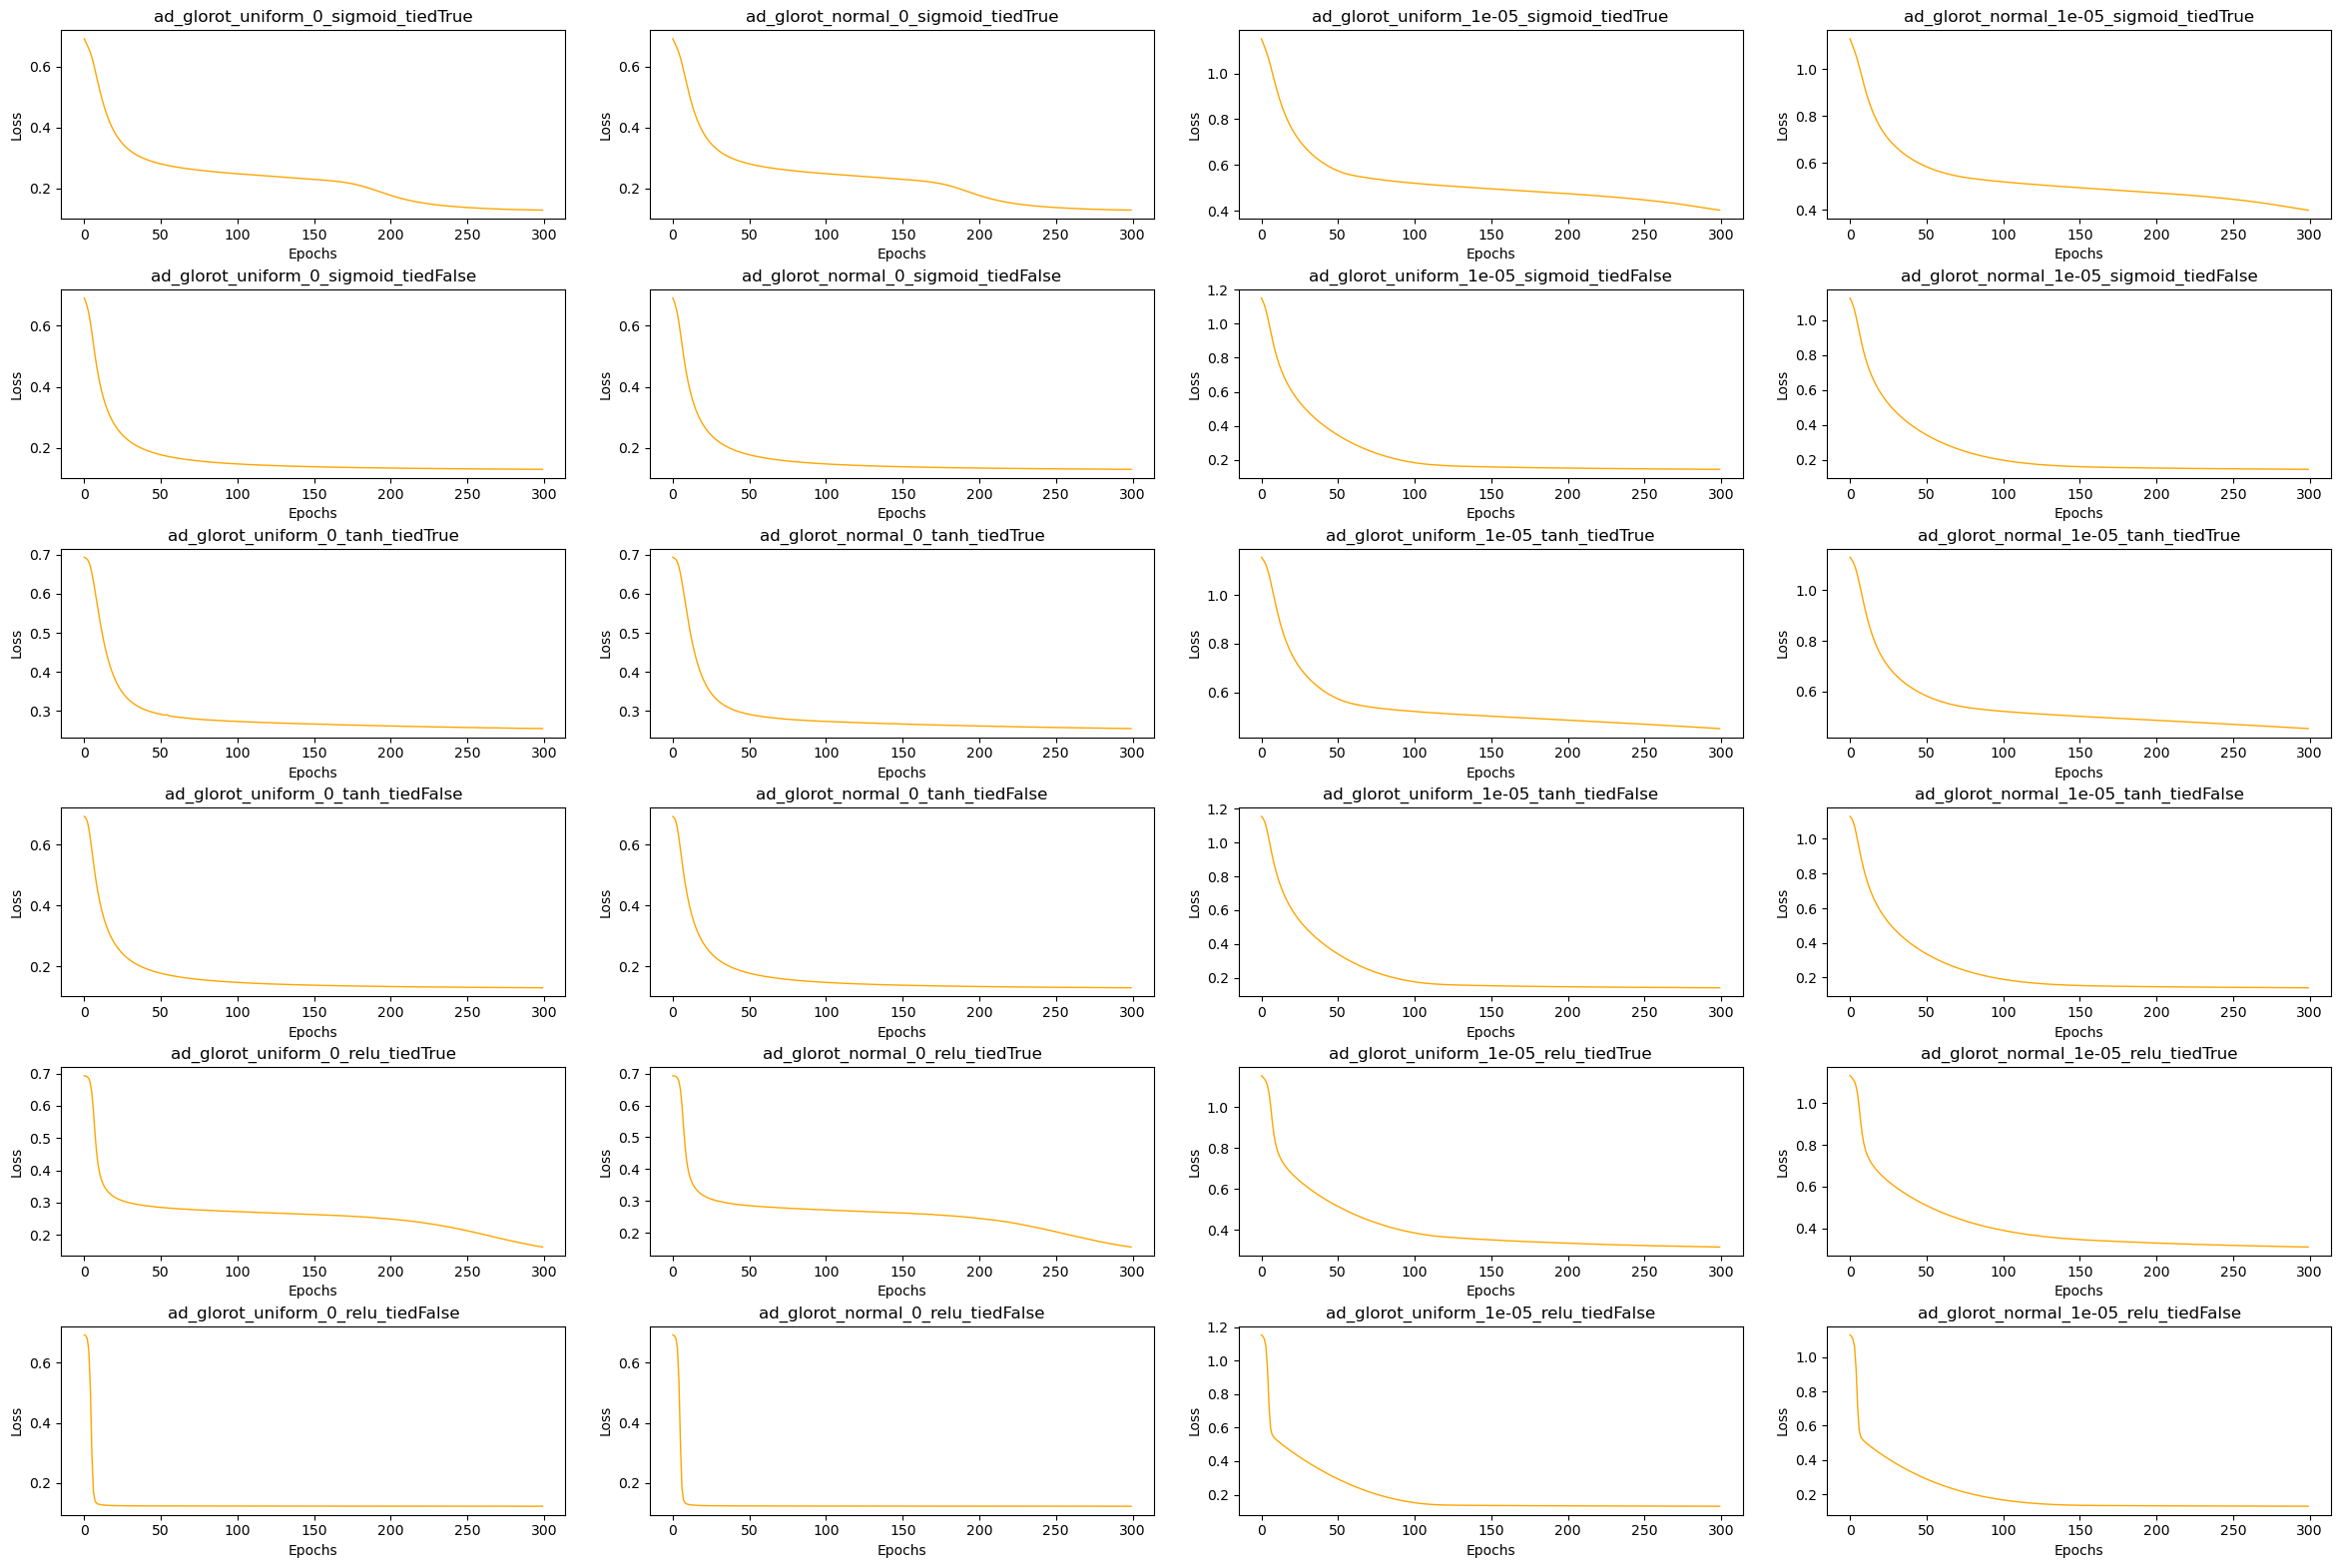

In [10]:
model_dict = model_dict_pan2

yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(xd*4 ,yd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict[name]
                ax[xi,yi].plot(list(range(0,300)), model_temp.loss, linewidth=1, markersize=2, color = 'orange')
                ax[xi,yi].set(title = name, xlabel = 'Epochs', ylabel = 'Loss')
                xi = xi+1
        yi=yi+1


    

In [11]:
model_dict_pan2.keys()

dict_keys(['tf_adage', 'ad_glorot_uniform_0_sigmoid_tiedTrue', 'ad_glorot_uniform_0_sigmoid_tiedFalse', 'ad_glorot_uniform_0_tanh_tiedTrue', 'ad_glorot_uniform_0_tanh_tiedFalse', 'ad_glorot_uniform_0_relu_tiedTrue', 'ad_glorot_uniform_0_relu_tiedFalse', 'ad_glorot_uniform_1e-05_sigmoid_tiedTrue', 'ad_glorot_uniform_1e-05_sigmoid_tiedFalse', 'ad_glorot_uniform_1e-05_tanh_tiedTrue', 'ad_glorot_uniform_1e-05_tanh_tiedFalse', 'ad_glorot_uniform_1e-05_relu_tiedTrue', 'ad_glorot_uniform_1e-05_relu_tiedFalse', 'ad_glorot_normal_0_sigmoid_tiedTrue', 'ad_glorot_normal_0_sigmoid_tiedFalse', 'ad_glorot_normal_0_tanh_tiedTrue', 'ad_glorot_normal_0_tanh_tiedFalse', 'ad_glorot_normal_0_relu_tiedTrue', 'ad_glorot_normal_0_relu_tiedFalse', 'ad_glorot_normal_1e-05_sigmoid_tiedTrue', 'ad_glorot_normal_1e-05_sigmoid_tiedFalse', 'ad_glorot_normal_1e-05_tanh_tiedTrue', 'ad_glorot_normal_1e-05_tanh_tiedFalse', 'ad_glorot_normal_1e-05_relu_tiedTrue', 'ad_glorot_normal_1e-05_relu_tiedFalse'])

/var/folders/23/gpbbzdn96nlby7kskvw28xs08dysdg/T/ipykernel_53302/2078745247.py:17: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],


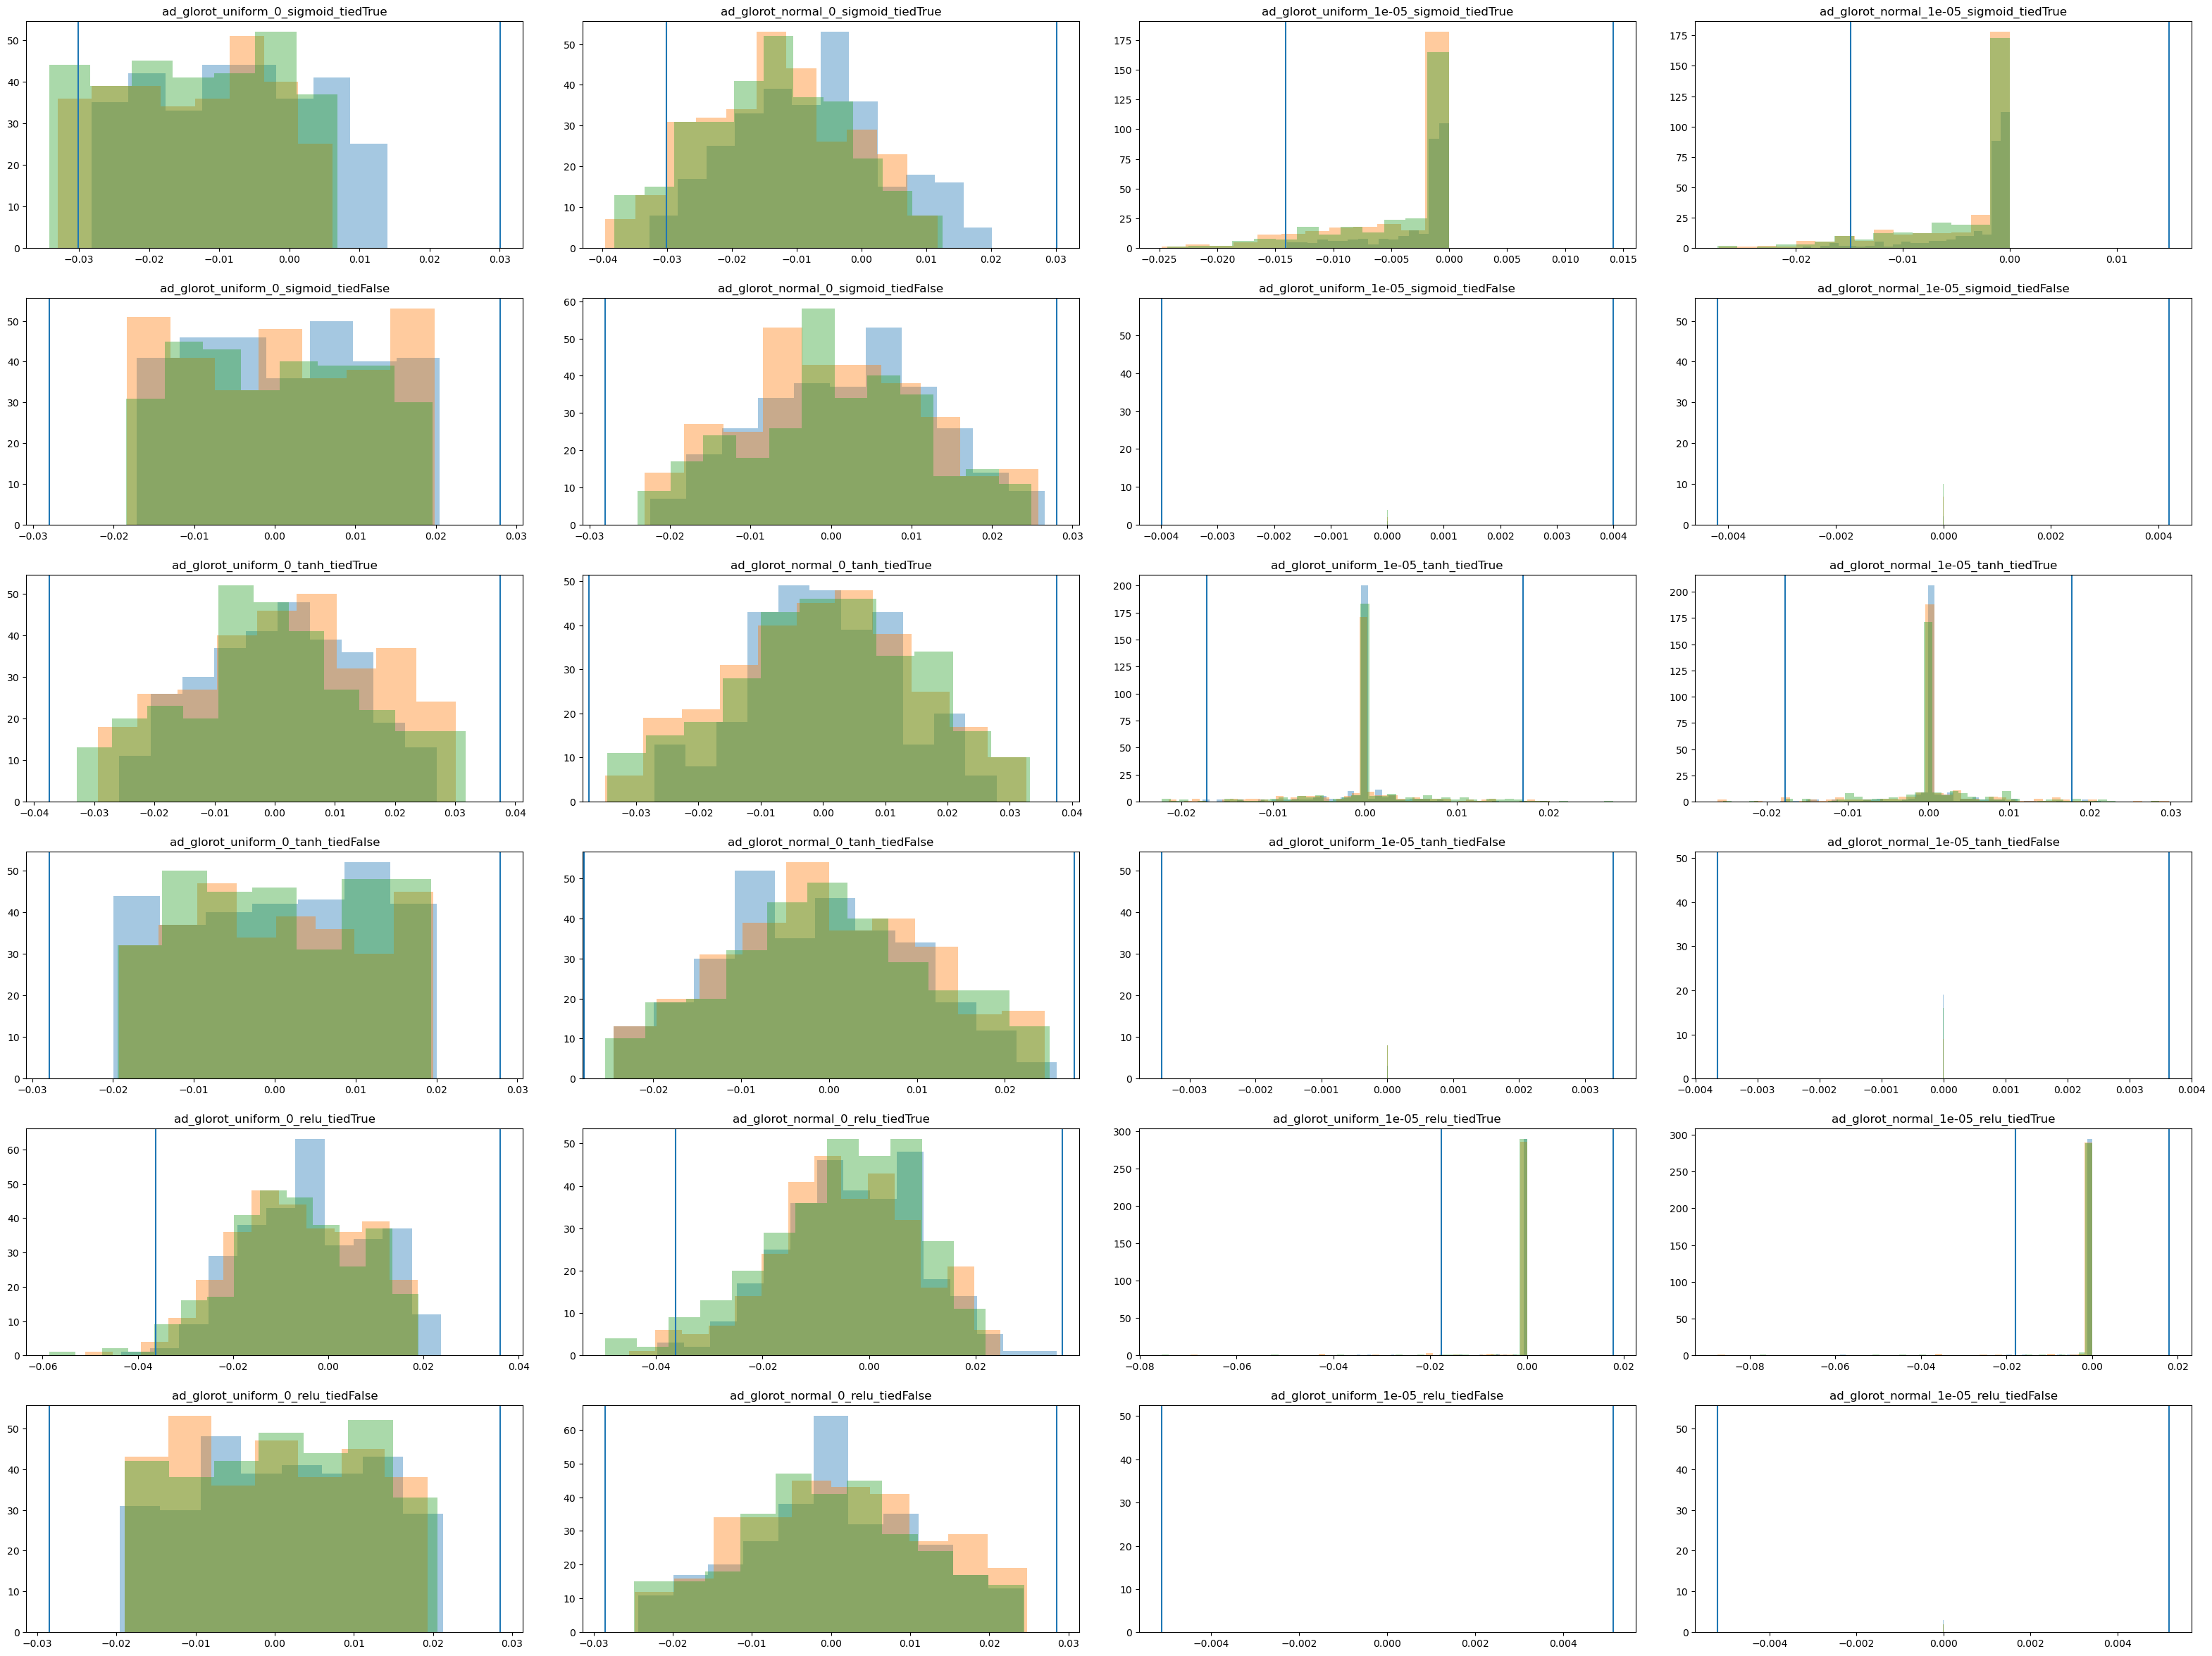

In [12]:
yd = len(inits) * len(L1_norm)
xd = len(act_fun) * len(tied)
fig, ax = plt.subplots(xd, yd,figsize=(yd*8 ,xd *4))
fig.tight_layout(pad=3.0)

xi = 0
yi = 0
for l in L1_norm:
    for i in inits:
        xi = 0
        for a in act_fun:
            for t in tied:
                name = 'ad_' + i + '_' + str(l) + '_' + a + '_tied' + str(t) #+ str(460)
                #print(name)
                model_temp = model_dict_pan2[name]
                for node in range(0,3):
                    sns.distplot(model_temp.weights[node], #[model_temp.weights[node] > 0],
                        ax=ax[xi,yi],
                        hist=True,
                        kde=False,
                        rug=False)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*2.5)
                ax[xi,yi].axvline(x = np.std(model_temp.weights)*-2.5)
                ax[xi,yi].set(title = name)
                xi = xi+1
        yi=yi+1


    